In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("DLBCL.csv")
print(new_data.shape)

(79, 7071)


# Preprocessing

In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df[df.columns[-1]].unique())
#Categorical to Numerical Data Conversion
df[df.columns[-1]] = pd.factorize(df[df.columns[-1]])[0]
print('Updated value of target class : '+str(df[df.columns[-1]].unique()))

['DLBCL' 'FL']
Updated value of target class : [0 1]


In [4]:
print('Required data set ')
df.head()

Required data set 


,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,0
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,0
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,0
5,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,0
6,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,0


In [5]:
df.isnull().sum()

A28102         0
AB000114_at    0
AB000115_at    0
AB000220_at    0
AB000409_at    0
              ..
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
class          0
Length: 7071, dtype: int64

In [6]:
feature_set = df.drop(df.columns[-1], 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['A28102', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000466_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000895_at', 'AB000896_at', 'AB000897_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002318_at', 'AB002365_at', 'AB002366_at', 'AB002380_at', 'AB002382_at', 'AB002409_at', 'AB002559_at', 'AB003102_at', 'AB003103_at', 'AB003177_at', 'AB003698_at', 'AB004884_at', 'AB006190_at', 'AC000061_cds2_at', 'AC000061_cds3_at', 'AC000062_at', 'AC000064_cds1_at', 'AC000064_cds2_at', 'AC000066_at', 'AC000099_at', 'AC000115_cds1_at', 'AC002045_xpt1_at', 'AC002073_cds1_at', 'AC002077_at', 'AC002086_at', 'AC002115_cds1_at', 'AC002115_cds3_at', 'AC002115_cds4_at', 'AC002115_rna2_at', 'AC002450_at', 'AC002464_at', 'AC002486_at', 'AD000092_cds1_at', 'AD000092_cds2_at', 'AD000684_cds1_at', 'AD001527_cds1_at', 'AF000177_at', 'AF000231_at', 'AF000234_at'

In [7]:
feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,-1,-45,176,97,-57,233,265,945,56,819,...,132,1036,-161,1523,-72,897,366,3,76,-28
3,25,-17,531,353,122,155,209,1688,42,639,...,147,4254,-75,6056,-68,737,81,-4,41,-45
4,73,91,257,80,614,507,760,2252,196,863,...,169,1934,-129,2901,-9,946,450,38,164,-62
5,267,41,202,138,198,355,245,1469,170,384,...,13,2469,93,2465,-119,339,321,-63,73,-13
6,16,24,187,39,145,254,571,930,-11,439,...,69,608,-39,1667,-87,721,213,15,155,-26


In [8]:
target_feature = df[df.columns[-1]]
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: class, dtype: int64

In [9]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.730817,-0.292937,-0.431595,-0.567503,-0.809531,-0.456305,-0.293827,-0.784873,-0.384965,0.213520,...,-0.469899,-0.282291,0.190071,-0.188077,0.520833,0.141759,0.384881,0.518999,0.206599,0.584699
1,-0.570425,-0.117207,0.149112,0.973353,-0.130132,-0.755853,-0.542402,0.134863,-0.448168,-0.154563,...,-0.355832,3.320297,0.446154,1.934349,0.534848,-0.065095,-0.553796,0.492245,0.059613,0.525299
2,-0.274317,0.560607,-0.299096,-0.669825,1.737265,0.595954,1.903393,0.833021,0.247067,0.303496,...,-0.188533,0.723030,0.285358,0.457126,0.741570,0.205108,0.661544,0.652770,0.576164,0.465899
3,0.922455,0.246804,-0.389065,-0.320725,0.158327,0.012219,-0.382604,-0.136230,0.129690,-0.676015,...,-1.374836,1.321969,0.946409,0.252983,0.356156,-0.579645,0.236669,0.266747,0.194000,0.637111
4,-0.625946,0.140111,-0.413602,-0.916603,-0.042835,-0.375657,1.064455,-0.803441,-0.687438,-0.563545,...,-0.948983,-0.761442,0.553352,-0.120654,0.468276,-0.085781,-0.119040,0.564864,0.538367,0.591687


# Training and Spilting of Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((61, 7070), (16, 7070))

# Selection of features using F Classification 

In [11]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train, 0.7)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :927.9947602748871 seconds


In [12]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 4859


In [13]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['X62573_at', 'Z34897_at', 'X12451_at', 'U59831_rna1_s_at', 'HG3162-HT3339_at', 'X15393_rna1_at', 'U49278_at', 'V00594_at', 'D38551_at', 'M21539_at', 'X52056_at', 'M27394_s_at', 'M26683_at', 'X64229_at', 'D63880_at', 'M27691_at', 'D63876_at', 'U79734_at', 'M55542_at', 'X65962_s_at', 'U65785_at', 'X82324_at', 'U06681_at', 'HG2264-HT2360_at', 'Y08417_s_at', 'M77698_at', 'U82468_at', 'HG4724-HT5166_at', 'M34668_at', 'Y10615_at', 'U49250_at', 'L21998_at', 'L10955_cds1_s_at', 'X06825_at', 'L03532_at', 'U59748_at', 'M13934_cds1_at', 'U41371_at', 'U62801_at', 'HG3703-HT3915_s_at', 'U73960_at', 'U77643_at', 'D88613_at', 'HG2238-HT2321_s_at', 'HG2365-HT2461_at', 'M17252_at', 'J04794_at', 'X59841_at', 'X68285_s_at', 'X04571_at', 'M14648_at', 'M94077_at', 'S72503_s_at', 'M84332_at', 'L21934_at', 'U46025_at', 'L32977_at', 'L41913_at', 'U40846_s_at', 'M16801_at', 'X77737_at', 'U13219_at', 'X68688_rna1_s_at', 'U64105_at', 'HG3731-HT4001_at', 'D29643_at', 'M83

In [14]:
columns = feature_set.shape[1]

number_of_features_required = 0.19*columns
print('number_of_features_required : '+str(number_of_features_required))

number_of_features_required = int(number_of_features_required)

print('number_of_features_required in integers: '+str(number_of_features_required))

number_of_features_required : 1343.3
number_of_features_required in integers: 1343


In [15]:
required_features_fc = selected_features_fc[:number_of_features_required]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 1343


In [16]:
X_train1 = X_train[required_features_fc]
X_train1.head()

,X62573_at,Z34897_at,X12451_at,U59831_rna1_s_at,HG3162-HT3339_at,X15393_rna1_at,U49278_at,V00594_at,D38551_at,M21539_at,...,U65416_rna1_s_at,U04325_cds3_at,D30755_at,U25435_at,Z50749_at,X15217_at,U64197_at,X51954_at,Y00264_at,U50822_rna1_s_at
22,-0.540563,-0.670999,0.546974,-0.823638,-2.097068,-1.299263,-0.965622,-0.458852,1.905247,-0.320828,...,-0.567607,0.118075,-0.369728,0.056313,-0.028448,0.426884,-0.423809,0.178375,-0.605995,0.689918
41,-0.590875,-0.551767,1.298703,-0.762326,0.260122,-0.796010,0.332630,-0.069275,1.595931,-0.915865,...,-0.687525,-0.693222,0.467989,-0.002771,-0.203363,-0.598881,-0.402846,-0.320561,1.142514,-0.305585
50,-0.092130,0.314647,0.202151,-0.597256,-0.559186,0.469150,-0.006979,1.026465,-0.482398,-0.554941,...,-0.756518,0.070967,0.499081,0.443642,-0.191159,0.882780,0.535223,0.084236,0.914291,0.533051
38,0.117868,2.595939,-0.153578,1.878804,0.807447,2.622733,-0.297151,-0.682044,-1.083653,1.049707,...,2.246343,1.290529,-0.725957,-0.603459,1.476631,-0.188575,1.955428,-0.838324,-0.431684,0.629584
61,0.076306,1.642088,-1.060519,2.567384,-0.199899,2.546824,-0.421818,-0.983557,-1.116091,-1.091450,...,0.797479,-0.353001,-1.313158,-2.632013,-1.065732,-2.342682,0.184102,-2.749341,-0.426293,-2.302626


In [17]:
X_test1 = X_test[required_features_fc]
X_test1.head()

,X62573_at,Z34897_at,X12451_at,U59831_rna1_s_at,HG3162-HT3339_at,X15393_rna1_at,U49278_at,V00594_at,D38551_at,M21539_at,...,U65416_rna1_s_at,U04325_cds3_at,D30755_at,U25435_at,Z50749_at,X15217_at,U64197_at,X51954_at,Y00264_at,U50822_rna1_s_at
48,-0.628062,-0.678947,-0.356612,-0.771759,-1.022565,-1.198050,0.291791,0.045814,-0.264602,-0.701262,...,-0.710522,0.128543,0.826883,-0.176741,-0.248108,-0.085999,-0.790652,0.121891,-0.185491,0.581318
74,-0.363377,-0.202022,-0.278586,-0.965127,-0.622985,-1.001247,-0.767875,-0.306073,0.722430,-1.437742,...,-0.968427,-0.389640,-0.120989,0.158069,0.502397,0.267321,-0.287553,-0.132283,-0.447857,-1.264889
59,-0.238691,1.427472,-0.688849,-1.493353,0.162745,0.542248,-1.204208,-0.789780,-0.466179,-0.267177,...,0.064833,-0.096526,-0.920506,-0.367123,-0.882682,1.532431,1.331796,1.383351,-0.419104,0.665785
54,-0.490251,-0.639204,1.402737,-0.988709,-1.103153,-1.006870,0.710929,-0.035447,0.606581,-1.003657,...,0.353949,0.254163,0.391590,0.850666,1.019006,0.814396,-0.408087,0.705552,0.267361,0.774385
34,-0.105255,1.435421,-0.745900,1.727882,2.143859,2.541201,-0.529289,-0.631118,-1.008351,1.264311,...,0.580642,-0.729861,0.447557,-1.548804,-1.206071,-0.655868,0.189343,0.959726,-0.553882,-1.083888


In [18]:
y_train.shape, y_test.shape

((61,), (16,))

In [19]:
y_train1 = np.array([a+1 for a in y_train]) 
print(y_train1)

y_test1 = np.array([a+1 for a in y_test])

print(y_test1)

[1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1]
[1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1]


# KNN Classifier

In [20]:
temp_fscore=0
temp_cm = np.zeros([2,2])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train1, y_train1) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train1)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train1, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test1)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test1, y_test_prediction)))
    
    f_score_knn = f1_score(y_test1, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test1, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test1, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test1, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test1, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test1, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 81.2500
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 90.1639
Testing accuracy on selected features for 2 neighbors: 81.2500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 95.0820
Testing accuracy on selected features for 3 neighbors: 87.5000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 90.1639
Testing accuracy on selected features for 4 neighbors: 100.0000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 93.4426
Testing accuracy on selected features for 5 neighbors: 100.0000
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 88.5246
Testing accuracy on selected features for 6 neighbors: 87.5000
KNN Classfier for 7 neighbors:
Training accuracy 

In [21]:
cm = confusion_matrix(y_test1, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[11  0]
 [ 0  5]]
Average Confusion matrix is : [[10.57894737  0.42105263]
 [ 3.31578947  1.68421053]]


Confusion Matrix of KNN Classifier:


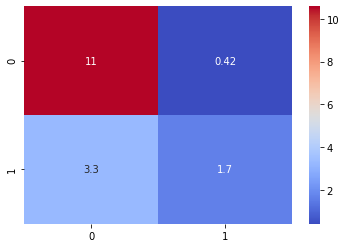

In [22]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [23]:
f_score_knn = f1_score(y_test1, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 1.0
Average F-Score is : 0.7664473684210527


# SVM(Support Vector Machine)

In [24]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train1,y_train1)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train1)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train1, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test1)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test1, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 93.4426
Testing accuracy on selected features: 68.7500


In [25]:
cm_svc = confusion_matrix(y_test1, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[11  0]
 [ 5  0]]


Confusion Matrix of SVM Classifier:


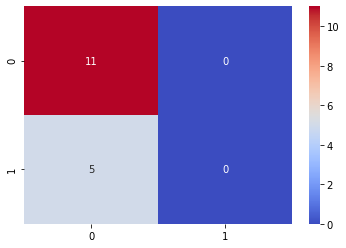

In [26]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [27]:
f_score_svc = f1_score(y_test1, y_test_prediction_svc,average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.6875


# Selection of features using Mutual Information 

In [28]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
 
  combo_d= np.vstack((x,y)).T # It is Combining the data values
  
  n=len(x)
  n_x=[]
  unique_y=len(set(y))
  
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=int(item[1])
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
  
 #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[int(pt[1])]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()

    k=2
    kth_dist_c=distx[k-1]
    dist=[]
   
   #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))

    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
   
    n_x_i=len(n_x[int(pt[1])])
    
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx+=1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)


In [29]:
X_train_tp=X_train.values.transpose()

In [30]:
mi_start_time = time.time()

total_features=len(feature_name)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Target Class and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Target Class and Feature_A28102 :  0.04263715301049374
Mutual Information between Target Class and Feature_AB000114_at :  0.008434676727678784
Mutual Information between Target Class and Feature_AB000115_at :  0.020725049520302623
Mutual Information between Target Class and Feature_AB000220_at :  0.014352665074147689
Mutual Information between Target Class and Feature_AB000409_at :  0.04650415083397273
Mutual Information between Target Class and Feature_AB000449_at :  0.04193602029200572
Mutual Information between Target Class and Feature_AB000450_at :  0.06716660718159836
Mutual Information between Target Class and Feature_AB000460_at :  0.036123142552220794
Mutual Information between Target Class and Feature_AB000462_at :  0.0904523499044449
Mutual Information between Target Class and Feature_AB000464_at :  0.016191651536420392
Mutual Information between Target Class and Feature_AB000466_at :  0.05792690131354943
Mutual Information between Target Class and 

Mutual Information between Target Class and Feature_AJ001421_at :  0.05697919237403721
Mutual Information between Target Class and Feature_AJ001487_at :  0.10021529571139415
Mutual Information between Target Class and Feature_D00017_at :  0.05931664917747605
Mutual Information between Target Class and Feature_D00591_at :  0.005151114574455654
Mutual Information between Target Class and Feature_D00596_at :  0.18931253957343241
Mutual Information between Target Class and Feature_D00632_at :  0.0018916114667841912
Mutual Information between Target Class and Feature_D00654_at :  0.022925299897861028
Mutual Information between Target Class and Feature_D00723_at :  0.08568256299263619
Mutual Information between Target Class and Feature_D00726_at :  0.09880298788635734
Mutual Information between Target Class and Feature_D00760_at :  0.029714516667289366
Mutual Information between Target Class and Feature_D00761_at :  0.1417264280528947
Mutual Information between Target Class and Feature_D0076

Mutual Information between Target Class and Feature_D16217_at :  0.07934320731878827
Mutual Information between Target Class and Feature_D16227_at :  0.07574003749698455
Mutual Information between Target Class and Feature_D16294_at :  0.09042238315206248
Mutual Information between Target Class and Feature_D16350_at :  0.09060411855463008
Mutual Information between Target Class and Feature_D16469_at :  0.04262414314070773
Mutual Information between Target Class and Feature_D16532_at :  0.06985406795383083
Mutual Information between Target Class and Feature_D16562_at :  0.023856825799277604
Mutual Information between Target Class and Feature_D16581_at :  0.025849715901943376
Mutual Information between Target Class and Feature_D16583_at :  0.11139320991232514
Mutual Information between Target Class and Feature_D16593_at :  0.023539642263802448
Mutual Information between Target Class and Feature_D16626_at :  0.027952180313007183
Mutual Information between Target Class and Feature_D16815_at

Mutual Information between Target Class and Feature_D30037_at :  0.13198688049647941
Mutual Information between Target Class and Feature_D30655_at :  0.03834464262303313
Mutual Information between Target Class and Feature_D30742_at :  0.12143010861846204
Mutual Information between Target Class and Feature_D30755_at :  0.028715759304521016
Mutual Information between Target Class and Feature_D30756_at :  0.0985474172215014
Mutual Information between Target Class and Feature_D30758_at :  0.15137283810914076
Mutual Information between Target Class and Feature_D31716_at :  0.05146802726115617
Mutual Information between Target Class and Feature_D31762_at :  0.009284876801099077
Mutual Information between Target Class and Feature_D31763_at :  0.06822986187451441
Mutual Information between Target Class and Feature_D31764_at :  0.009895377411599697
Mutual Information between Target Class and Feature_D31765_at :  0.027251344950914986
Mutual Information between Target Class and Feature_D31766_at 

Mutual Information between Target Class and Feature_D49410_at :  0.020918645452834582
Mutual Information between Target Class and Feature_D49488_at :  0.05216677560405054
Mutual Information between Target Class and Feature_D49489_at :  0.0606361207679221
Mutual Information between Target Class and Feature_D49490_at :  0.08852415014850319
Mutual Information between Target Class and Feature_D49493_at :  0.023811965957553895
Mutual Information between Target Class and Feature_D49677_at :  0.050943135855820644
Mutual Information between Target Class and Feature_D49738_at :  0.03553117817999448
Mutual Information between Target Class and Feature_D49742_at :  0.05273698112239814
Mutual Information between Target Class and Feature_D49817_at :  0.05423435069476931
Mutual Information between Target Class and Feature_D49818_at :  0.0460795046300872
Mutual Information between Target Class and Feature_D49950_at :  0.09008211618332553
Mutual Information between Target Class and Feature_D49958_at : 

Mutual Information between Target Class and Feature_D70830_at :  0.0520950965063348
Mutual Information between Target Class and Feature_D76435_at :  0.11291856265766978
Mutual Information between Target Class and Feature_D76444_at :  0.011471066517398116
Mutual Information between Target Class and Feature_D78011_at :  0.15446221936526094
Mutual Information between Target Class and Feature_D78012_at :  0.008875068481327828
Mutual Information between Target Class and Feature_D78014_at :  0.039935677922133206
Mutual Information between Target Class and Feature_D78129_at :  0.00380524177105267
Mutual Information between Target Class and Feature_D78134_at :  0.12148082665975232
Mutual Information between Target Class and Feature_D78151_at :  0.016206540515167227
Mutual Information between Target Class and Feature_D78156_at :  0.05222943224565457
Mutual Information between Target Class and Feature_D78261_at :  0.11785989396110329
Mutual Information between Target Class and Feature_D78275_at 

Mutual Information between Target Class and Feature_D85815_at :  0.0803552300398928
Mutual Information between Target Class and Feature_D85939_at :  0.0027520741310763526
Mutual Information between Target Class and Feature_D86096_cds3_at :  0.14118337447828536
Mutual Information between Target Class and Feature_D86425_at :  0.06404704683822726
Mutual Information between Target Class and Feature_D86479_at :  0.14160630682621608
Mutual Information between Target Class and Feature_D86519_at :  0.01613485205148263
Mutual Information between Target Class and Feature_D86549_at :  0.08722999803467894
Mutual Information between Target Class and Feature_D86640_at :  0.08596104840507358
Mutual Information between Target Class and Feature_D86956_at :  0.10741078922905914
Mutual Information between Target Class and Feature_D86957_at :  0.004731599347755692
Mutual Information between Target Class and Feature_D86959_at :  0.1695159725337682
Mutual Information between Target Class and Feature_D86960_

Mutual Information between Target Class and Feature_D87937_at :  0.06248288722199438
Mutual Information between Target Class and Feature_D87953_at :  0.07394634838756911
Mutual Information between Target Class and Feature_D87957_at :  0.026691417526080875
Mutual Information between Target Class and Feature_D87969_at :  0.02978692434077499
Mutual Information between Target Class and Feature_D87989_at :  0.005468630165522605
Mutual Information between Target Class and Feature_D88146_at :  0.0814870317479246
Mutual Information between Target Class and Feature_D88152_at :  0.11912506107728298
Mutual Information between Target Class and Feature_D88213_at :  0.02223446906250906
Mutual Information between Target Class and Feature_D88270_at :  0.07318451014637523
Mutual Information between Target Class and Feature_D88378_at :  0.012963755129434035
Mutual Information between Target Class and Feature_D88422_at :  0.029047940784243487
Mutual Information between Target Class and Feature_D88460_at 

Mutual Information between Target Class and Feature_HG2415-HT2511_at :  0.12437390068506794
Mutual Information between Target Class and Feature_HG2416-HT2512_at :  0.05019786069045669
Mutual Information between Target Class and Feature_HG2417-HT2513_at :  0.12655613013792621
Mutual Information between Target Class and Feature_HG2442-HT2538_at :  0.013707179541842862
Mutual Information between Target Class and Feature_HG2460-HT2556_at :  0.22707779876267
Mutual Information between Target Class and Feature_HG2463-HT2559_at :  0.022015264899108596
Mutual Information between Target Class and Feature_HG2480-HT2576_at :  0.047911165683059725
Mutual Information between Target Class and Feature_HG2492-HT2588_at :  0.03209788060747956
Mutual Information between Target Class and Feature_HG2507-HT2603_at :  0.04366927824445097
Mutual Information between Target Class and Feature_HG2525-HT2621_at :  0.10220568719069599
Mutual Information between Target Class and Feature_HG2530-HT2626_at :  0.035726

Mutual Information between Target Class and Feature_HG3578-HT3781_at :  0.07171761879279151
Mutual Information between Target Class and Feature_HG358-HT358_at :  0.04159754964532775
Mutual Information between Target Class and Feature_HG3627-HT3836_at :  0.07715488848135509
Mutual Information between Target Class and Feature_HG363-HT363_at :  0.017977990800511618
Mutual Information between Target Class and Feature_HG37-HT37_at :  0.06456441225433904
Mutual Information between Target Class and Feature_HG3733-HT4003_at :  0.1053936860246624
Mutual Information between Target Class and Feature_HG3740-HT4010_at :  0.1092734439812107
Mutual Information between Target Class and Feature_HG3748-HT4018_at :  0.04420822017683551
Mutual Information between Target Class and Feature_HG3790-HT4060_at :  0.0752217421739641
Mutual Information between Target Class and Feature_HG384-HT384_at :  0.032978506445890676
Mutual Information between Target Class and Feature_HG3872-HT4142_at :  0.00708493111631577

Mutual Information between Target Class and Feature_HG732-HT732_at :  0.037010384444639555
Mutual Information between Target Class and Feature_HG742-HT742_at :  0.06802508922983612
Mutual Information between Target Class and Feature_HG821-HT821_at :  1.2388685922044817e-05
Mutual Information between Target Class and Feature_HG825-HT825_at :  0.19376845047477076
Mutual Information between Target Class and Feature_HG830-HT830_at :  0.0859984452462999
Mutual Information between Target Class and Feature_HG831-HT831_at :  0.08151519319220316
Mutual Information between Target Class and Feature_HG846-HT846_at :  0.028154123462760264
Mutual Information between Target Class and Feature_HG870-HT870_at :  0.13155598839490265
Mutual Information between Target Class and Feature_HG896-HT896_at :  0.053517790838738304
Mutual Information between Target Class and Feature_HG907-HT907_at :  0.029840169876483132
Mutual Information between Target Class and Feature_HG908-HT908_at :  0.03408027353126436
Mutu

Mutual Information between Target Class and Feature_J04823_rna1_at :  0.11155632135506133
Mutual Information between Target Class and Feature_J04948_at :  0.07345554389137235
Mutual Information between Target Class and Feature_J04970_at :  0.038180765613916506
Mutual Information between Target Class and Feature_J04973_at :  0.09595893726574238
Mutual Information between Target Class and Feature_J04982_at :  0.09191192275635619
Mutual Information between Target Class and Feature_J04988_at :  0.20929083086319913
Mutual Information between Target Class and Feature_J04990_at :  0.049591966399540305
Mutual Information between Target Class and Feature_J05008_at :  0.09155276829030205
Mutual Information between Target Class and Feature_J05032_at :  0.07500334480377478
Mutual Information between Target Class and Feature_J05037_at :  0.03456869107960963
Mutual Information between Target Class and Feature_J05068_at :  0.09640394737162315
Mutual Information between Target Class and Feature_J05070

Mutual Information between Target Class and Feature_L06895_at :  0.04735188889427471
Mutual Information between Target Class and Feature_L07033_at :  0.01686052064723476
Mutual Information between Target Class and Feature_L07044_at :  0.08562595206683049
Mutual Information between Target Class and Feature_L07077_at :  0.243552915095174
Mutual Information between Target Class and Feature_L07493_at :  0.03461451742726816
Mutual Information between Target Class and Feature_L07515_at :  0.06413446173142016
Mutual Information between Target Class and Feature_L07540_at :  0.008618295426922122
Mutual Information between Target Class and Feature_L07541_at :  0.01479787105214056
Mutual Information between Target Class and Feature_L07548_at :  0.247001276022772
Mutual Information between Target Class and Feature_L07590_at :  0.1608025224563072
Mutual Information between Target Class and Feature_L07592_at :  0.019116088127006672
Mutual Information between Target Class and Feature_L07594_at :  0.0

Mutual Information between Target Class and Feature_L13977_at :  0.05302761116835765
Mutual Information between Target Class and Feature_L13994_at :  0.06197867662604649
Mutual Information between Target Class and Feature_L14076_at :  0.0021144462277980984
Mutual Information between Target Class and Feature_L14269_at :  0.0002022261708415388
Mutual Information between Target Class and Feature_L14542_at :  0.051656278752894906
Mutual Information between Target Class and Feature_L14565_at :  0.03390632161412808
Mutual Information between Target Class and Feature_L14595_at :  0.0264896909828965
Mutual Information between Target Class and Feature_L14754_at :  0.040845556005195245
Mutual Information between Target Class and Feature_L14787_at :  0.029610242780971744
Mutual Information between Target Class and Feature_L14812_at :  0.034594746219099276
Mutual Information between Target Class and Feature_L14813_at :  0.016600643091044132
Mutual Information between Target Class and Feature_L1483

Mutual Information between Target Class and Feature_L24564_at :  0.0978067565200424
Mutual Information between Target Class and Feature_L24783_at :  0.12909082391189827
Mutual Information between Target Class and Feature_L24804_at :  0.07815884140189434
Mutual Information between Target Class and Feature_L25080_at :  0.11528147046039608
Mutual Information between Target Class and Feature_L25081_at :  0.026204108842050895
Mutual Information between Target Class and Feature_L25085_at :  0.1713377269718093
Mutual Information between Target Class and Feature_L25119_at :  0.0872295076240987
Mutual Information between Target Class and Feature_L25270_at :  0.03433424383709256
Mutual Information between Target Class and Feature_L25441_at :  0.3078262960899933
Mutual Information between Target Class and Feature_L25444_at :  0.09091814628171696
Mutual Information between Target Class and Feature_L25798_at :  0.0889503843354591
Mutual Information between Target Class and Feature_L25851_at :  0.01

Mutual Information between Target Class and Feature_L37042_at :  0.03985170896506083
Mutual Information between Target Class and Feature_L37043_at :  0.1666343525509831
Mutual Information between Target Class and Feature_L37127_at :  0.00922959383487586
Mutual Information between Target Class and Feature_L37199_at :  0.03683086614845837
Mutual Information between Target Class and Feature_L37347_at :  0.05063057741886489
Mutual Information between Target Class and Feature_L37362_at :  0.07327984062125419
Mutual Information between Target Class and Feature_L37368_at :  0.050845435420608154
Mutual Information between Target Class and Feature_L37378_at :  0.02853275096700605
Mutual Information between Target Class and Feature_L37792_at :  0.00588907120194886
Mutual Information between Target Class and Feature_L37882_at :  0.13770654083628614
Mutual Information between Target Class and Feature_L37936_at :  0.16514120852017736
Mutual Information between Target Class and Feature_L38025_at :  

Mutual Information between Target Class and Feature_L42452_at :  0.12597683156559328
Mutual Information between Target Class and Feature_L42542_at :  0.04319352279990902
Mutual Information between Target Class and Feature_L42563_at :  0.029389061412249347
Mutual Information between Target Class and Feature_L42572_at :  0.08757421919912307
Mutual Information between Target Class and Feature_L42621_at :  0.10168427415275251
Mutual Information between Target Class and Feature_L43338_at :  0.07380736179381701
Mutual Information between Target Class and Feature_L43366_at :  0.11377651995778776
Mutual Information between Target Class and Feature_L43631_at :  0.01868146956866852
Mutual Information between Target Class and Feature_L43821_at :  0.03127425364970218
Mutual Information between Target Class and Feature_L43964_at :  0.07776479769782169
Mutual Information between Target Class and Feature_L47345_at :  0.04571180448739604
Mutual Information between Target Class and Feature_L47726_at : 

Mutual Information between Target Class and Feature_M21904_at :  0.017455434929442556
Mutual Information between Target Class and Feature_M21934_at :  0.01557434029280306
Mutual Information between Target Class and Feature_M21984_at :  0.011376616443592433
Mutual Information between Target Class and Feature_M21985_at :  0.1783957539545333
Mutual Information between Target Class and Feature_M22005_at :  0.06516510768132998
Mutual Information between Target Class and Feature_M22092_at :  0.08689071982654828
Mutual Information between Target Class and Feature_M22324_at :  0.0020939137182667375
Mutual Information between Target Class and Feature_M22382_at :  0.3232762989470278
Mutual Information between Target Class and Feature_M22430_at :  0.013166766184561824
Mutual Information between Target Class and Feature_M22489_at :  0.12779385630332837
Mutual Information between Target Class and Feature_M22490_at :  0.10524664409443277
Mutual Information between Target Class and Feature_M22538_at 

Mutual Information between Target Class and Feature_M29581_at :  0.02173494412698452
Mutual Information between Target Class and Feature_M29696_at :  0.05519563358105059
Mutual Information between Target Class and Feature_M29877_at :  0.0896245268207416
Mutual Information between Target Class and Feature_M29927_at :  0.053947370366678495
Mutual Information between Target Class and Feature_M29960_at :  0.1474768550028474
Mutual Information between Target Class and Feature_M29971_at :  0.02199515750195202
Mutual Information between Target Class and Feature_M30135_at :  0.016786334127747715
Mutual Information between Target Class and Feature_M30185_at :  0.15066160827857386
Mutual Information between Target Class and Feature_M30269_at :  0.03705628753119084
Mutual Information between Target Class and Feature_M30496_at :  0.08836769831049239
Mutual Information between Target Class and Feature_M30773_at :  0.2101658575785423
Mutual Information between Target Class and Feature_M30818_at :  0

Mutual Information between Target Class and Feature_M54927_at :  0.15376694300447677
Mutual Information between Target Class and Feature_M54951_at :  0.025092611871129225
Mutual Information between Target Class and Feature_M54968_at :  0.030068034315338145
Mutual Information between Target Class and Feature_M54992_at :  0.09592658632198196
Mutual Information between Target Class and Feature_M54995_at :  0.10934486808881669
Mutual Information between Target Class and Feature_M55040_at :  0.1508074631068403
Mutual Information between Target Class and Feature_M55047_at :  0.03974244291440291
Mutual Information between Target Class and Feature_M55067_at :  0.10834578319683996
Mutual Information between Target Class and Feature_M55131_at :  0.15983095327787142
Mutual Information between Target Class and Feature_M55150_at :  0.04131303462735874
Mutual Information between Target Class and Feature_M55153_at :  0.06520703011007167
Mutual Information between Target Class and Feature_M55172_at : 

Mutual Information between Target Class and Feature_M62486_at :  0.08641915531843535
Mutual Information between Target Class and Feature_M62505_at :  0.09448391646612078
Mutual Information between Target Class and Feature_M62762_at :  0.17658751414348897
Mutual Information between Target Class and Feature_M62783_at :  0.03228131991871113
Mutual Information between Target Class and Feature_M62800_at :  9.317514914997833e-05
Mutual Information between Target Class and Feature_M62810_at :  0.003156980384535554
Mutual Information between Target Class and Feature_M62831_at :  0.07376377391271713
Mutual Information between Target Class and Feature_M62840_at :  0.004915852021134076
Mutual Information between Target Class and Feature_M62843_at :  0.01785460484657925
Mutual Information between Target Class and Feature_M62958_at :  0.07895148906909187
Mutual Information between Target Class and Feature_M62982_at :  0.08336932292279842
Mutual Information between Target Class and Feature_M62994_at

Mutual Information between Target Class and Feature_M74524_at :  0.03804422682970984
Mutual Information between Target Class and Feature_M74525_at :  0.035297306005668605
Mutual Information between Target Class and Feature_M74542_at :  0.01104703699500796
Mutual Information between Target Class and Feature_M74558_at :  0.16273174332050505
Mutual Information between Target Class and Feature_M74719_at :  0.021565805433255678
Mutual Information between Target Class and Feature_M74826_at :  0.049940830007806
Mutual Information between Target Class and Feature_M75099_at :  0.03647662321292592
Mutual Information between Target Class and Feature_M75106_at :  0.02755045785246119
Mutual Information between Target Class and Feature_M75110_at :  0.045192117882044684
Mutual Information between Target Class and Feature_M75126_at :  0.06430400985178795
Mutual Information between Target Class and Feature_M76180_at :  0.09607986856487737
Mutual Information between Target Class and Feature_M76231_at : 

Mutual Information between Target Class and Feature_M86752_at :  0.14550602732429724
Mutual Information between Target Class and Feature_M86808_at :  0.1288686627783277
Mutual Information between Target Class and Feature_M86826_at :  0.0041675161087368524
Mutual Information between Target Class and Feature_M86849_at :  0.1568175598353555
Mutual Information between Target Class and Feature_M86852_at :  0.005688233685384956
Mutual Information between Target Class and Feature_M86868_at :  0.046308136292040857
Mutual Information between Target Class and Feature_M86917_at :  0.026133740012191403
Mutual Information between Target Class and Feature_M86934_at :  0.06297935545336307
Mutual Information between Target Class and Feature_M87284_at :  0.0954728314874703
Mutual Information between Target Class and Feature_M87338_at :  0.0063270300108842735
Mutual Information between Target Class and Feature_M87339_at :  0.1771929196669272
Mutual Information between Target Class and Feature_M87434_at 

Mutual Information between Target Class and Feature_M96759_rna1_at :  0.07306841971243429
Mutual Information between Target Class and Feature_M96789_at :  0.030410867577650748
Mutual Information between Target Class and Feature_M96803_at :  0.0007987885295720621
Mutual Information between Target Class and Feature_M96859_at :  0.0829220587374357
Mutual Information between Target Class and Feature_M96944_at :  0.11534077945523552
Mutual Information between Target Class and Feature_M96980_at :  0.07510517600146732
Mutual Information between Target Class and Feature_M96982_at :  0.09535401800173014
Mutual Information between Target Class and Feature_M97287_at :  0.07756925267598119
Mutual Information between Target Class and Feature_M97388_at :  0.025619543955438407
Mutual Information between Target Class and Feature_M97496_at :  0.056997889523881885
Mutual Information between Target Class and Feature_M97639_at :  0.024950288932150982
Mutual Information between Target Class and Feature_M97

Mutual Information between Target Class and Feature_S77575_at :  0.21085270956722654
Mutual Information between Target Class and Feature_S77576_at :  0.0004419227220134935
Mutual Information between Target Class and Feature_S77583_at :  0.007331295903321878
Mutual Information between Target Class and Feature_S77763_at :  0.035613843323431676
Mutual Information between Target Class and Feature_S77812_at :  0.06760847987867366
Mutual Information between Target Class and Feature_S78085_at :  0.003939642438367106
Mutual Information between Target Class and Feature_S78187_at :  0.08488249094339441
Mutual Information between Target Class and Feature_S78203_at :  0.023180581555677697
Mutual Information between Target Class and Feature_S78296_at :  0.14308998835198541
Mutual Information between Target Class and Feature_S78432_xpt1_at :  0.08705276179186892
Mutual Information between Target Class and Feature_S78569_at :  0.03239671656205323
Mutual Information between Target Class and Feature_S7

Mutual Information between Target Class and Feature_U02632_at :  0.008371419543721812
Mutual Information between Target Class and Feature_U02680_at :  0.06444378892722435
Mutual Information between Target Class and Feature_U02687_at :  0.17733190432510984
Mutual Information between Target Class and Feature_U03056_at :  0.12003050808928738
Mutual Information between Target Class and Feature_U03057_at :  0.003058067961109523
Mutual Information between Target Class and Feature_U03090_at :  0.06669437481379922
Mutual Information between Target Class and Feature_U03100_at :  0.010498987697111254
Mutual Information between Target Class and Feature_U03105_at :  0.055507758034301226
Mutual Information between Target Class and Feature_U03187_at :  0.05145479535469021
Mutual Information between Target Class and Feature_U03270_at :  0.07893694067324336
Mutual Information between Target Class and Feature_U03272_at :  0.053212967706173224
Mutual Information between Target Class and Feature_U03274_a

Mutual Information between Target Class and Feature_U09366_at :  0.0038064245591207246
Mutual Information between Target Class and Feature_U09367_at :  0.05410664301520373
Mutual Information between Target Class and Feature_U09368_at :  0.02278640259770686
Mutual Information between Target Class and Feature_U09410_at :  0.015496879734413499
Mutual Information between Target Class and Feature_U09411_at :  0.11820739013791484
Mutual Information between Target Class and Feature_U09412_at :  0.2130124805794566
Mutual Information between Target Class and Feature_U09413_at :  0.2581882114927655
Mutual Information between Target Class and Feature_U09414_at :  0.015924315775372545
Mutual Information between Target Class and Feature_U09477_at :  0.03135366816161716
Mutual Information between Target Class and Feature_U09550_at :  0.041242378604987376
Mutual Information between Target Class and Feature_U09564_at :  0.0963494330563041
Mutual Information between Target Class and Feature_U09578_at :

Mutual Information between Target Class and Feature_U15085_at :  0.16027002976378604
Mutual Information between Target Class and Feature_U15128_at :  0.13850363332470766
Mutual Information between Target Class and Feature_U15131_at :  0.029709542491079738
Mutual Information between Target Class and Feature_U15172_at :  0.008335675010654856
Mutual Information between Target Class and Feature_U15173_at :  0.013868643863295858
Mutual Information between Target Class and Feature_U15174_at :  0.04944092008166653
Mutual Information between Target Class and Feature_U15177_at :  0.07276378777877898
Mutual Information between Target Class and Feature_U15197_at :  0.021360773670846836
Mutual Information between Target Class and Feature_U15306_at :  0.04361664417542344
Mutual Information between Target Class and Feature_U15422_cds2_at :  0.05161423637300505
Mutual Information between Target Class and Feature_U15460_at :  0.1407848765689131
Mutual Information between Target Class and Feature_U1555

Mutual Information between Target Class and Feature_U20908_at :  0.030679535746511735
Mutual Information between Target Class and Feature_U20979_at :  0.08446449768598031
Mutual Information between Target Class and Feature_U20980_at :  0.016645302942337924
Mutual Information between Target Class and Feature_U20998_at :  0.002079942350605292
Mutual Information between Target Class and Feature_U21049_at :  0.06501706283958368
Mutual Information between Target Class and Feature_U21051_rna1_at :  0.02949193244742244
Mutual Information between Target Class and Feature_U21090_at :  0.21085820702073918
Mutual Information between Target Class and Feature_U21128_at :  0.0933326542492848
Mutual Information between Target Class and Feature_U21551_at :  0.03990919497617095
Mutual Information between Target Class and Feature_U21858_at :  0.1074584579965929
Mutual Information between Target Class and Feature_U21931_at :  0.15926480952570238
Mutual Information between Target Class and Feature_U21936_

Mutual Information between Target Class and Feature_U29680_at :  0.13806717746741456
Mutual Information between Target Class and Feature_U29700_at :  0.05294121508735386
Mutual Information between Target Class and Feature_U29725_at :  0.007909830814191984
Mutual Information between Target Class and Feature_U29953_rna1_at :  0.17313888222280244
Mutual Information between Target Class and Feature_U30185_at :  0.027564845336739377
Mutual Information between Target Class and Feature_U30245_at :  0.2111866036812557
Mutual Information between Target Class and Feature_U30246_at :  0.058534040527119136
Mutual Information between Target Class and Feature_U30255_at :  0.02698617050609033
Mutual Information between Target Class and Feature_U30313_at :  0.09178314070257569
Mutual Information between Target Class and Feature_U30521_at :  0.130003224116576
Mutual Information between Target Class and Feature_U30610_at :  0.020152305454181924
Mutual Information between Target Class and Feature_U30825_

Mutual Information between Target Class and Feature_U36500_at :  0.05403452068885617
Mutual Information between Target Class and Feature_U36501_at :  0.010752506710120848
Mutual Information between Target Class and Feature_U36601_at :  0.0580421304763856
Mutual Information between Target Class and Feature_U36621_cds2_at :  0.037685553408267104
Mutual Information between Target Class and Feature_U36764_at :  0.1146933290935662
Mutual Information between Target Class and Feature_U36787_at :  0.08861340466453803
Mutual Information between Target Class and Feature_U36798_at :  0.008041948508990485
Mutual Information between Target Class and Feature_U36922_at :  0.02060203956122711
Mutual Information between Target Class and Feature_U37012_at :  0.06523868138074745
Mutual Information between Target Class and Feature_U37022_rna1_at :  0.20080938483586996
Mutual Information between Target Class and Feature_U37122_at :  0.005344316998779364
Mutual Information between Target Class and Feature_U

Mutual Information between Target Class and Feature_U43077_at :  0.003154708333634007
Mutual Information between Target Class and Feature_U43083_at :  0.08552500903460795
Mutual Information between Target Class and Feature_U43142_at :  0.0973972964493255
Mutual Information between Target Class and Feature_U43148_at :  0.01430831988756529
Mutual Information between Target Class and Feature_U43177_at :  0.10844207375495139
Mutual Information between Target Class and Feature_U43279_at :  0.07018543058027542
Mutual Information between Target Class and Feature_U43286_at :  0.03117968881763086
Mutual Information between Target Class and Feature_U43292_at :  0.04950024145246335
Mutual Information between Target Class and Feature_U43318_at :  0.06401229221847549
Mutual Information between Target Class and Feature_U43328_at :  0.21769306866168397
Mutual Information between Target Class and Feature_U43374_at :  0.06391173731982887
Mutual Information between Target Class and Feature_U43408_at :  

Mutual Information between Target Class and Feature_U53830_at :  0.0381479027530579
Mutual Information between Target Class and Feature_U54617_at :  0.10838856428472873
Mutual Information between Target Class and Feature_U54778_at :  0.08628146318170031
Mutual Information between Target Class and Feature_U54804_at :  0.07230460030328521
Mutual Information between Target Class and Feature_U54999_at :  0.02455944909363821
Mutual Information between Target Class and Feature_U55054_at :  0.043787739018649456
Mutual Information between Target Class and Feature_U55206_at :  0.009609410280139183
Mutual Information between Target Class and Feature_U55209_at :  0.04729922916757506
Mutual Information between Target Class and Feature_U55258_at :  0.12141352803843186
Mutual Information between Target Class and Feature_U55764_at :  0.05653059188322206
Mutual Information between Target Class and Feature_U55766_at :  0.011812658119838336
Mutual Information between Target Class and Feature_U55853_at :

Mutual Information between Target Class and Feature_U60805_at :  0.23735821681043873
Mutual Information between Target Class and Feature_U60873_at :  0.021744813552387447
Mutual Information between Target Class and Feature_U60975_at :  0.09836598781697863
Mutual Information between Target Class and Feature_U61145_at :  0.11464924918220717
Mutual Information between Target Class and Feature_U61166_at :  0.07122077956644408
Mutual Information between Target Class and Feature_U61167_at :  0.010341295203226285
Mutual Information between Target Class and Feature_U61232_at :  0.1384070541297678
Mutual Information between Target Class and Feature_U61234_at :  0.040931123866952336
Mutual Information between Target Class and Feature_U61262_at :  0.04477141000047785
Mutual Information between Target Class and Feature_U61263_at :  0.07637734717225803
Mutual Information between Target Class and Feature_U61374_at :  0.04259918039073595
Mutual Information between Target Class and Feature_U61538_at :

Mutual Information between Target Class and Feature_U66619_at :  0.042881534330951786
Mutual Information between Target Class and Feature_U66661_at :  0.0016724073033837067
Mutual Information between Target Class and Feature_U66669_at :  0.027812497591357246
Mutual Information between Target Class and Feature_U66702_at :  0.14645758738521916
Mutual Information between Target Class and Feature_U66838_at :  0.03303452796755198
Mutual Information between Target Class and Feature_U66879_at :  0.04100534351658738
Mutual Information between Target Class and Feature_U67156_at :  0.13695292992974198
Mutual Information between Target Class and Feature_U67171_at :  0.030845724160048278
Mutual Information between Target Class and Feature_U67191_at :  0.08494760205398828
Mutual Information between Target Class and Feature_U67319_at :  0.11642541909224192
Mutual Information between Target Class and Feature_U67369_at :  0.01412169227208199
Mutual Information between Target Class and Feature_U67611_a

Mutual Information between Target Class and Feature_U73704_at :  0.06562383311848512
Mutual Information between Target Class and Feature_U73737_at :  0.07148796888000924
Mutual Information between Target Class and Feature_U73799_at :  0.0015494829579168197
Mutual Information between Target Class and Feature_U73824_at :  0.0498485654783108
Mutual Information between Target Class and Feature_U73843_at :  0.10538915789561011
Mutual Information between Target Class and Feature_U73960_at :  0.11073024382023662
Mutual Information between Target Class and Feature_U74612_at :  0.3106732144177138
Mutual Information between Target Class and Feature_U74667_at :  0.003908473831981499
Mutual Information between Target Class and Feature_U75308_at :  0.09841843991861107
Mutual Information between Target Class and Feature_U75362_at :  0.021069600249619968
Mutual Information between Target Class and Feature_U75370_at :  0.04755946820021467
Mutual Information between Target Class and Feature_U75679_at :

Mutual Information between Target Class and Feature_U79296_at :  0.1601798168861372
Mutual Information between Target Class and Feature_U79297_at :  0.012040342517154566
Mutual Information between Target Class and Feature_U79298_at :  0.02765124104753235
Mutual Information between Target Class and Feature_U79299_at :  0.1408096413099877
Mutual Information between Target Class and Feature_U79300_at :  0.1335281737687274
Mutual Information between Target Class and Feature_U79301_at :  0.15200134780577498
Mutual Information between Target Class and Feature_U79302_at :  0.03021015085089734
Mutual Information between Target Class and Feature_U79303_at :  0.030256750189774202
Mutual Information between Target Class and Feature_U79304_at :  0.08997233881533585
Mutual Information between Target Class and Feature_U79526_at :  0.16166699760427256
Mutual Information between Target Class and Feature_U79716_at :  0.14940644395027625
Mutual Information between Target Class and Feature_U79718_at :  0

Mutual Information between Target Class and Feature_U86409_at :  0.01281572127333546
Mutual Information between Target Class and Feature_U86529_at :  0.007450228356162881
Mutual Information between Target Class and Feature_U86602_at :  0.023244363669190977
Mutual Information between Target Class and Feature_U86782_at :  0.14777086345136245
Mutual Information between Target Class and Feature_U87223_at :  0.0765431318451352
Mutual Information between Target Class and Feature_U87269_at :  0.09489458513513878
Mutual Information between Target Class and Feature_U87309_at :  0.17369655801605904
Mutual Information between Target Class and Feature_U87408_at :  0.09744208002693569
Mutual Information between Target Class and Feature_U87459_at :  0.11741333928359396
Mutual Information between Target Class and Feature_U87460_at :  0.1104848835338927
Mutual Information between Target Class and Feature_U87964_at :  0.04729654438025608
Mutual Information between Target Class and Feature_U87972_at :  

Mutual Information between Target Class and Feature_U95006_at :  0.1834590351543542
Mutual Information between Target Class and Feature_U95020_at :  0.07886690965205036
Mutual Information between Target Class and Feature_U95040_at :  0.13319752526169684
Mutual Information between Target Class and Feature_U95090_at :  0.12435371220757341
Mutual Information between Target Class and Feature_U95626_rna1_at :  0.08377747309586984
Mutual Information between Target Class and Feature_U95740_rna1_at :  0.0785860342978737
Mutual Information between Target Class and Feature_U95740_rna2_at :  0.09313865595030248
Mutual Information between Target Class and Feature_U96094_at :  0.01266660068316523
Mutual Information between Target Class and Feature_U96113_at :  0.023416043216473215
Mutual Information between Target Class and Feature_U96114_at :  0.20161022163621403
Mutual Information between Target Class and Feature_U96115_at :  0.11362694567077795
Mutual Information between Target Class and Feature

Mutual Information between Target Class and Feature_X05997_at :  0.136687504357891
Mutual Information between Target Class and Feature_X06256_at :  0.009219956252914276
Mutual Information between Target Class and Feature_X06272_at :  0.0974256994189049
Mutual Information between Target Class and Feature_X06290_at :  0.1802701318535013
Mutual Information between Target Class and Feature_X06323_at :  0.1210254532535592
Mutual Information between Target Class and Feature_X06389_at :  0.062401705327763686
Mutual Information between Target Class and Feature_X06482_at :  0.10778690683893584
Mutual Information between Target Class and Feature_X06562_at :  0.01691448315891637
Mutual Information between Target Class and Feature_X06614_at :  0.023087077292166476
Mutual Information between Target Class and Feature_X06617_at :  0.0786907892324266
Mutual Information between Target Class and Feature_X06661_at :  0.13699388787862724
Mutual Information between Target Class and Feature_X06745_at :  0.0

Mutual Information between Target Class and Feature_X16560_at :  0.08886138376497614
Mutual Information between Target Class and Feature_X16662_at :  0.18954039255818822
Mutual Information between Target Class and Feature_X16663_at :  0.06137076368083682
Mutual Information between Target Class and Feature_X16665_at :  0.12913801464480912
Mutual Information between Target Class and Feature_X16667_at :  0.13571410090390082
Mutual Information between Target Class and Feature_X16706_at :  0.050788669436029166
Mutual Information between Target Class and Feature_X16707_at :  0.014117632659122789
Mutual Information between Target Class and Feature_X16832_at :  0.176699515075162
Mutual Information between Target Class and Feature_X16901_at :  0.09475582661631123
Mutual Information between Target Class and Feature_X16983_at :  0.0863208067089874
Mutual Information between Target Class and Feature_X17025_at :  0.07225437005624653
Mutual Information between Target Class and Feature_X17042_at :  0

Mutual Information between Target Class and Feature_X55740_at :  0.04167905535258871
Mutual Information between Target Class and Feature_X55777_cds2_at :  0.019929855683782884
Mutual Information between Target Class and Feature_X55885_at :  0.03781216391337326
Mutual Information between Target Class and Feature_X55889_at :  0.08861829552953382
Mutual Information between Target Class and Feature_X55954_at :  0.01588128585652452
Mutual Information between Target Class and Feature_X56199_at :  0.08690864592074417
Mutual Information between Target Class and Feature_X56253_rna1_at :  0.0009167505835337167
Mutual Information between Target Class and Feature_X56411_rna1_at :  0.06907166033680413
Mutual Information between Target Class and Feature_X56465_at :  0.1636420650205164
Mutual Information between Target Class and Feature_X56468_at :  0.07020184229926305
Mutual Information between Target Class and Feature_X56494_at :  0.3084187066304192
Mutual Information between Target Class and Featu

Mutual Information between Target Class and Feature_X63097_at :  0.036401461682998924
Mutual Information between Target Class and Feature_X63187_at :  0.05107613127570127
Mutual Information between Target Class and Feature_X63337_at :  0.08297503837952643
Mutual Information between Target Class and Feature_X63359_at :  0.00501639907709399
Mutual Information between Target Class and Feature_X63380_at :  0.0037073828826109803
Mutual Information between Target Class and Feature_X63417_at :  0.0263367540773077
Mutual Information between Target Class and Feature_X63422_at :  0.07495833730939411
Mutual Information between Target Class and Feature_X63454_at :  0.08597257791274578
Mutual Information between Target Class and Feature_X63469_at :  0.06545351394246852
Mutual Information between Target Class and Feature_X63527_at :  0.04289041230165061
Mutual Information between Target Class and Feature_X63546_at :  0.049334644554002986
Mutual Information between Target Class and Feature_X63563_at 

Mutual Information between Target Class and Feature_X69111_at :  0.08982204996976209
Mutual Information between Target Class and Feature_X69141_at :  0.021781482288276786
Mutual Information between Target Class and Feature_X69150_at :  0.01431407960631287
Mutual Information between Target Class and Feature_X69391_at :  0.0673621676437049
Mutual Information between Target Class and Feature_X69398_at :  0.00879648945689746
Mutual Information between Target Class and Feature_X69433_at :  0.2564881623541661
Mutual Information between Target Class and Feature_X69550_at :  0.09766094200053396
Mutual Information between Target Class and Feature_X69636_at :  0.07570943462696086
Mutual Information between Target Class and Feature_X69699_at :  0.0049458067134498
Mutual Information between Target Class and Feature_X69819_at :  0.00855702459660595
Mutual Information between Target Class and Feature_X69838_at :  0.08600743342257779
Mutual Information between Target Class and Feature_X69878_at :  0.

Mutual Information between Target Class and Feature_X76302_at :  0.11183514984317541
Mutual Information between Target Class and Feature_X76342_at :  0.22034809168543257
Mutual Information between Target Class and Feature_X76383_at :  0.175063685745289
Mutual Information between Target Class and Feature_X76498_at :  0.1414750210306536
Mutual Information between Target Class and Feature_X76534_at :  0.23797835463269007
Mutual Information between Target Class and Feature_X76538_at :  0.03173779342100973
Mutual Information between Target Class and Feature_X76648_at :  0.054263482853817935
Mutual Information between Target Class and Feature_X76717_at :  0.07195002958797163
Mutual Information between Target Class and Feature_X76732_at :  0.07453322635260044
Mutual Information between Target Class and Feature_X76770_at :  0.06050057991181818
Mutual Information between Target Class and Feature_X77094_at :  0.13190290254364903
Mutual Information between Target Class and Feature_X77166_at :  0.

Mutual Information between Target Class and Feature_X82153_at :  0.17243001408434955
Mutual Information between Target Class and Feature_X82200_at :  0.06395281446937902
Mutual Information between Target Class and Feature_X82207_at :  0.04872632206111229
Mutual Information between Target Class and Feature_X82224_at :  0.004102790809661886
Mutual Information between Target Class and Feature_X82240_rna1_at :  0.26741558406991955
Mutual Information between Target Class and Feature_X82324_at :  0.1291027738318571
Mutual Information between Target Class and Feature_X82434_at :  0.05588571718109716
Mutual Information between Target Class and Feature_X82456_at :  0.019321081305194422
Mutual Information between Target Class and Feature_X82494_at :  0.010574328888653008
Mutual Information between Target Class and Feature_X82539_at :  0.04391729980394791
Mutual Information between Target Class and Feature_X82554_rna1_at :  0.04525051981414057
Mutual Information between Target Class and Feature_X

Mutual Information between Target Class and Feature_X90761_at :  0.02546250072339359
Mutual Information between Target Class and Feature_X90763_at :  0.008395488411710719
Mutual Information between Target Class and Feature_X90780_rna1_at :  0.09723265137844786
Mutual Information between Target Class and Feature_X90828_at :  0.06391612360324596
Mutual Information between Target Class and Feature_X90840_at :  0.015724554377443366
Mutual Information between Target Class and Feature_X90857_at :  0.07132244678825767
Mutual Information between Target Class and Feature_X90858_at :  0.001899936475109166
Mutual Information between Target Class and Feature_X90872_at :  0.0343211150545248
Mutual Information between Target Class and Feature_X90908_at :  0.08631814021447125
Mutual Information between Target Class and Feature_X90978_at :  0.014320187574114842
Mutual Information between Target Class and Feature_X90999_at :  0.04612701917602838
Mutual Information between Target Class and Feature_X9110

Mutual Information between Target Class and Feature_X97324_at :  0.0007338894074227525
Mutual Information between Target Class and Feature_X97335_at :  0.013428903361376553
Mutual Information between Target Class and Feature_X97544_at :  0.01788460503074378
Mutual Information between Target Class and Feature_X97630_at :  0.016188212837019062
Mutual Information between Target Class and Feature_X97671_at :  0.12377046121448636
Mutual Information between Target Class and Feature_X97674_at :  0.023245491969652136
Mutual Information between Target Class and Feature_X97675_rna1_at :  0.019704391975324115
Mutual Information between Target Class and Feature_X97795_at :  0.045282191742610355
Mutual Information between Target Class and Feature_X98001_at :  0.07226460910241916
Mutual Information between Target Class and Feature_X98085_at :  0.08401736367450365
Mutual Information between Target Class and Feature_X98172_at :  0.062056787820485126
Mutual Information between Target Class and Feature_

Mutual Information between Target Class and Feature_Y08564_at :  0.1917441742581126
Mutual Information between Target Class and Feature_Y08612_at :  0.007428651839890113
Mutual Information between Target Class and Feature_Y08613_at :  0.08674671169927586
Mutual Information between Target Class and Feature_Y08614_at :  0.07800839985801021
Mutual Information between Target Class and Feature_Y08639_at :  0.02329741422504596
Mutual Information between Target Class and Feature_Y08836_at :  0.11522506762810919
Mutual Information between Target Class and Feature_Y08837_at :  0.13469872452944212
Mutual Information between Target Class and Feature_Y08915_at :  0.06193750113282021
Mutual Information between Target Class and Feature_Y08976_at :  0.00028957951623900574
Mutual Information between Target Class and Feature_Y08991_at :  0.008109931008523199
Mutual Information between Target Class and Feature_Y08999_at :  0.04673725752129404
Mutual Information between Target Class and Feature_Y09022_at

Mutual Information between Target Class and Feature_Z19002_at :  0.004903042069825206
Mutual Information between Target Class and Feature_Z19574_rna1_at :  0.012409701523180288
Mutual Information between Target Class and Feature_Z19585_at :  0.12583893008623395
Mutual Information between Target Class and Feature_Z21488_at :  0.06717282387914414
Mutual Information between Target Class and Feature_Z21507_at :  0.05449897508896788
Mutual Information between Target Class and Feature_Z21707_at :  0.08103018691683504
Mutual Information between Target Class and Feature_Z21966_at :  0.23586232118988193
Mutual Information between Target Class and Feature_Z22534_at :  0.061055325191351595
Mutual Information between Target Class and Feature_Z22535_at :  0.06719297676814946
Mutual Information between Target Class and Feature_Z22536_at :  0.04898515830465932
Mutual Information between Target Class and Feature_Z22548_at :  0.05730883530598662
Mutual Information between Target Class and Feature_Z2255

Mutual Information between Target Class and Feature_Z49099_at :  0.23100632107206592
Mutual Information between Target Class and Feature_Z49155_at :  0.083684408833352
Mutual Information between Target Class and Feature_Z49194_at :  0.03286788463552776
Mutual Information between Target Class and Feature_Z49205_at :  0.03803632330809045
Mutual Information between Target Class and Feature_Z49208_at :  0.12652162626073343
Mutual Information between Target Class and Feature_Z49254_at :  0.19576339745871654
Mutual Information between Target Class and Feature_Z49269_at :  0.03448164107076347
Mutual Information between Target Class and Feature_Z49878_at :  0.03896200919291963
Mutual Information between Target Class and Feature_Z49989_at :  0.007207895182798465
Mutual Information between Target Class and Feature_Z49995_at :  0.11971054117095978
Mutual Information between Target Class and Feature_Z50022_at :  0.019406034421025627
Mutual Information between Target Class and Feature_Z50053_at :  

Mutual Information between Target Class and Feature_D83646_at :  0.009741561559280671
Mutual Information between Target Class and Feature_D86550_at :  0.05295120054815896
Mutual Information between Target Class and Feature_D86958_at :  0.09760918741072157
Mutual Information between Target Class and Feature_D86988_at :  0.01267082073924323
Mutual Information between Target Class and Feature_D87002_cds2_at :  0.052487973108075237
Mutual Information between Target Class and Feature_HG162-HT3165_at :  0.038344011423129924
Mutual Information between Target Class and Feature_HG2465-HT4871_at :  0.0787451751548401
Mutual Information between Target Class and Feature_HG2743-HT2845_at :  0.07844875764161714
Mutual Information between Target Class and Feature_HG2841-HT2970_at :  0.21737950003808643
Mutual Information between Target Class and Feature_HG2846-HT2983_at :  0.053604287553923796
Mutual Information between Target Class and Feature_HG3543-HT3739_at :  0.041070397161963305
Mutual Informat

Mutual Information between Target Class and Feature_M91463_rna1_at :  0.06454241694545851
Mutual Information between Target Class and Feature_M93651_at :  0.056070508380581585
Mutual Information between Target Class and Feature_M94046_at :  0.03365502778902402
Mutual Information between Target Class and Feature_M94055_at :  0.14944801681007477
Mutual Information between Target Class and Feature_M96843_at :  0.08506353972067963
Mutual Information between Target Class and Feature_M97252_at :  0.0962779173284999
Mutual Information between Target Class and Feature_M97676_at :  0.039942069927629525
Mutual Information between Target Class and Feature_S41458_at :  0.016285858247596482
Mutual Information between Target Class and Feature_S60415_at :  0.04883039503514192
Mutual Information between Target Class and Feature_S66427_at :  0.08954958191163989
Mutual Information between Target Class and Feature_S66896_at :  0.06948315685485802
Mutual Information between Target Class and Feature_S68805

Mutual Information between Target Class and Feature_D10922_s_at :  0.12601480157358086
Mutual Information between Target Class and Feature_L06797_s_at :  0.006641733839857357
Mutual Information between Target Class and Feature_L09230_s_at :  0.07240415902851208
Mutual Information between Target Class and Feature_D11327_s_at :  0.04993982918713302
Mutual Information between Target Class and Feature_D12620_s_at :  0.07927818563353305
Mutual Information between Target Class and Feature_D12775_s_at :  0.0609062728389546
Mutual Information between Target Class and Feature_M19650_s_at :  0.0049850327471567014
Mutual Information between Target Class and Feature_S50017_s_at :  0.05764710031748697
Mutual Information between Target Class and Feature_M15465_s_at :  0.11611099694689139
Mutual Information between Target Class and Feature_D79206_s_at :  0.07239157347213848
Mutual Information between Target Class and Feature_HG1686-HT4572_s_at :  0.055933894052943314
Mutual Information between Target

Mutual Information between Target Class and Feature_L38593_s_at :  0.07515568800954922
Mutual Information between Target Class and Feature_U50079_s_at :  0.012741137387276157
Mutual Information between Target Class and Feature_D50477_s_at :  0.08280463236825308
Mutual Information between Target Class and Feature_X86371_s_at :  0.09530009609488002
Mutual Information between Target Class and Feature_Z75190_s_at :  0.109851060675028
Mutual Information between Target Class and Feature_D50855_s_at :  0.07185132602630584
Mutual Information between Target Class and Feature_U58046_s_at :  0.14774658495502938
Mutual Information between Target Class and Feature_D55643_s_at :  0.08859478124359757
Mutual Information between Target Class and Feature_D63479_s_at :  0.03497541862941183
Mutual Information between Target Class and Feature_D63861_s_at :  0.0003047193061215186
Mutual Information between Target Class and Feature_D63882_s_at :  0.06713273450430876
Mutual Information between Target Class an

Mutual Information between Target Class and Feature_M86757_s_at :  0.01990137947655219
Mutual Information between Target Class and Feature_HG2358-HT4858_s_at :  0.008362924628068416
Mutual Information between Target Class and Feature_L14778_s_at :  0.127779810007916
Mutual Information between Target Class and Feature_HG2367-HT2463_s_at :  0.005329079923539044
Mutual Information between Target Class and Feature_HG2379-HT3996_s_at :  0.020347493601420786
Mutual Information between Target Class and Feature_HG2379-HT3997_s_at :  0.14614148727403695
Mutual Information between Target Class and Feature_HG2380-HT2476_s_at :  0.027765376715898384
Mutual Information between Target Class and Feature_HG2383-HT4824_s_at :  0.07259185302645041
Mutual Information between Target Class and Feature_HG2414-HT2510_s_at :  0.05730373791314398
Mutual Information between Target Class and Feature_HG243-HT243_s_at :  0.11628578500994519
Mutual Information between Target Class and Feature_HG2441-HT2537_s_at :  

Mutual Information between Target Class and Feature_HG3426-HT3610_s_at :  0.10893276989161514
Mutual Information between Target Class and Feature_HG3431-HT3616_s_at :  0.09972529216986817
Mutual Information between Target Class and Feature_HG3432-HT3620_s_at :  0.11352415014850319
Mutual Information between Target Class and Feature_HG3437-HT3628_s_at :  0.026271111645312106
Mutual Information between Target Class and Feature_HG3484-HT3678_s_at :  0.10345511797613131
Mutual Information between Target Class and Feature_HG3523-HT4899_s_at :  0.05879354377855256
Mutual Information between Target Class and Feature_M13929_s_at :  0.03427838384268229
Mutual Information between Target Class and Feature_J03242_s_at :  0.1348224329221958
Mutual Information between Target Class and Feature_M17863_s_at :  0.02785791697071803
Mutual Information between Target Class and Feature_HG36-HT4101_s_at :  0.07080554311506547
Mutual Information between Target Class and Feature_HG3638-HT3849_s_at :  0.0711015

Mutual Information between Target Class and Feature_J00268_s_at :  0.014552402406263647
Mutual Information between Target Class and Feature_V00594_at :  0.1301880963000017
Mutual Information between Target Class and Feature_V00594_s_at :  0.13735787513032
Mutual Information between Target Class and Feature_V00574_s_at :  0.07352775514110702
Mutual Information between Target Class and Feature_M29386_s_at :  0.10168441715145914
Mutual Information between Target Class and Feature_V00599_s_at :  0.12677530618531338
Mutual Information between Target Class and Feature_J02621_s_at :  0.03424470212854579
Mutual Information between Target Class and Feature_J02683_s_at :  0.1663597426959794
Mutual Information between Target Class and Feature_J02758_s_at :  0.021790428496748747
Mutual Information between Target Class and Feature_X05130_s_at :  0.06017455551741558
Mutual Information between Target Class and Feature_M27436_s_at :  0.022766785240919744
Mutual Information between Target Class and Fea

Mutual Information between Target Class and Feature_L12760_s_at :  0.059826010260178204
Mutual Information between Target Class and Feature_M26665_at :  0.14616970867425214
Mutual Information between Target Class and Feature_M26665_s_at :  0.03887577671758398
Mutual Information between Target Class and Feature_L05624_s_at :  0.09519903264305782
Mutual Information between Target Class and Feature_L05628_s_at :  0.014050455110929097
Mutual Information between Target Class and Feature_Z94753_s_at :  0.1688179522962108
Mutual Information between Target Class and Feature_U50360_s_at :  0.10835588287852005
Mutual Information between Target Class and Feature_Z31560_s_at :  0.03429987705112669
Mutual Information between Target Class and Feature_M88461_s_at :  0.005788117729338479
Mutual Information between Target Class and Feature_U06643_s_at :  0.005238149393715955
Mutual Information between Target Class and Feature_U51003_s_at :  0.06804914005198875
Mutual Information between Target Class an

Mutual Information between Target Class and Feature_U15637_s_at :  0.11770689818371023
Mutual Information between Target Class and Feature_U32986_s_at :  0.0470793174221775
Mutual Information between Target Class and Feature_L40384_s_at :  0.1080275747748786
Mutual Information between Target Class and Feature_L40386_s_at :  0.006067800416733036
Mutual Information between Target Class and Feature_U61734_s_at :  0.020030955947586505
Mutual Information between Target Class and Feature_U43185_s_at :  0.014537610495224656
Mutual Information between Target Class and Feature_M97347_s_at :  0.13819619772061673
Mutual Information between Target Class and Feature_L49209_s_at :  0.08809559249706067
Mutual Information between Target Class and Feature_L42374_s_at :  0.028062119277187072
Mutual Information between Target Class and Feature_L43575_s_at :  0.06154503057751943
Mutual Information between Target Class and Feature_L43579_at :  0.08420188530309465
Mutual Information between Target Class and

Mutual Information between Target Class and Feature_M20642_s_at :  0.09067962049092473
Mutual Information between Target Class and Feature_M20747_s_at :  0.06351646202606095
Mutual Information between Target Class and Feature_M20778_s_at :  0.04700213150498022
Mutual Information between Target Class and Feature_M26311_s_at :  0.13956072204449974
Mutual Information between Target Class and Feature_M84371_rna1_s_at :  0.1296139048747977
Mutual Information between Target Class and Feature_M21142_cds2_s_at :  0.06508790264387748
Mutual Information between Target Class and Feature_M54914_s_at :  0.09504627310301668
Mutual Information between Target Class and Feature_M26692_s_at :  0.07416283043621065
Mutual Information between Target Class and Feature_Z20656_rna1_s_at :  0.01781707944143247
Mutual Information between Target Class and Feature_M21665_s_at :  0.07422701740874751
Mutual Information between Target Class and Feature_M35851_s_at :  0.05949552800567777
Mutual Information between Ta

Mutual Information between Target Class and Feature_M60450_s_at :  0.019364568600871265
Mutual Information between Target Class and Feature_X54993_s_at :  0.05916767374271957
Mutual Information between Target Class and Feature_M55682_s_at :  0.04048703912923211
Mutual Information between Target Class and Feature_M55998_s_at :  0.0490295319231457
Mutual Information between Target Class and Feature_M57466_s_at :  0.14646772915574718
Mutual Information between Target Class and Feature_U16720_rna1_s_at :  0.08529829749451225
Mutual Information between Target Class and Feature_M57703_s_at :  0.11012323379010301
Mutual Information between Target Class and Feature_M65134_s_at :  0.1378792560102324
Mutual Information between Target Class and Feature_X13461_s_at :  0.07237645280251115
Mutual Information between Target Class and Feature_M58525_s_at :  0.04680460629836259
Mutual Information between Target Class and Feature_M59216_s_at :  0.1629993986464728
Mutual Information between Target Class 

Mutual Information between Target Class and Feature_U12387_s_at :  0.013636621684399802
Mutual Information between Target Class and Feature_S62904_s_at :  0.07650961641265795
Mutual Information between Target Class and Feature_S68134_s_at :  0.07078675521727991
Mutual Information between Target Class and Feature_X86401_s_at :  0.015501253641873254
Mutual Information between Target Class and Feature_S69272_s_at :  0.08249376636121661
Mutual Information between Target Class and Feature_S69370_s_at :  0.08379937342517295
Mutual Information between Target Class and Feature_X51362_s_at :  0.09248990875505253
Mutual Information between Target Class and Feature_S72024_s_at :  0.007513221186754564
Mutual Information between Target Class and Feature_S72503_s_at :  0.020312998719986104
Mutual Information between Target Class and Feature_U24056_s_at :  0.09956979848923352
Mutual Information between Target Class and Feature_S73885_s_at :  0.06820485865033032
Mutual Information between Target Class

Mutual Information between Target Class and Feature_U26266_s_at :  0.016262162680366607
Mutual Information between Target Class and Feature_U26312_s_at :  0.0023695645157032906
Mutual Information between Target Class and Feature_U60206_s_at :  0.1718270173231158
Mutual Information between Target Class and Feature_Z16411_s_at :  0.07590930597628195
Mutual Information between Target Class and Feature_U27333_at :  0.0379308277107916
Mutual Information between Target Class and Feature_U27333_s_at :  0.05736259767547531
Mutual Information between Target Class and Feature_U27326_s_at :  0.08284239083848928
Mutual Information between Target Class and Feature_U28488_s_at :  0.11470326906252258
Mutual Information between Target Class and Feature_U75276_s_at :  0.0253248267032781
Mutual Information between Target Class and Feature_Z50115_s_at :  0.2329264326448954
Mutual Information between Target Class and Feature_U30827_s_at :  0.03275058559357256
Mutual Information between Target Class and Fe

Mutual Information between Target Class and Feature_Z70218_s_at :  0.11556521349114497
Mutual Information between Target Class and Feature_X83301_s_at :  0.03203833177743893
Mutual Information between Target Class and Feature_X83535_s_at :  0.034820520574447816
Mutual Information between Target Class and Feature_X87871_s_at :  0.03691111586053329
Mutual Information between Target Class and Feature_Z49825_s_at :  0.04246871600774657
Mutual Information between Target Class and Feature_Z69043_s_at :  0.10675358934898467
Mutual Information between Target Class and Feature_X90846_at :  0.14445878927986364
Mutual Information between Target Class and Feature_X90846_s_at :  0.024638214849585085
Mutual Information between Target Class and Feature_X95240_s_at :  0.09396558771131823
Mutual Information between Target Class and Feature_X95632_s_at :  0.024424247319092162
Mutual Information between Target Class and Feature_X98178_s_at :  0.10563258815858055
Mutual Information between Target Class an

Mutual Information between Target Class and Feature_U25975_at :  0.0033820809779865966
Mutual Information between Target Class and Feature_U27460_at :  0.05375360852269808
Mutual Information between Target Class and Feature_U28014_at :  0.04719723229419072
Mutual Information between Target Class and Feature_U28015_at :  0.15127419609527046
Mutual Information between Target Class and Feature_U40279_at :  0.005128986944797261
Mutual Information between Target Class and Feature_U43944_at :  0.19850092201052097
Mutual Information between Target Class and Feature_U44103_at :  0.06972291495382538
Mutual Information between Target Class and Feature_U44105_at :  0.24475218895850923
Mutual Information between Target Class and Feature_U49441_at :  0.03245629882387593
Mutual Information between Target Class and Feature_U62432_at :  0.2226302080250529
Mutual Information between Target Class and Feature_U66061_cds3_at :  0.04574743610903178
Mutual Information between Target Class and Feature_U66077

Mutual Information between Target Class and Feature_U69611_at :  0.05119168956733654
Mutual Information between Target Class and Feature_X00038_at :  0.13670165570305792
Mutual Information between Target Class and Feature_X00540_at :  0.10298043612118263
Mutual Information between Target Class and Feature_X05345_at :  0.03299585989609703
Mutual Information between Target Class and Feature_X06318_at :  0.07327971009982252
Mutual Information between Target Class and Feature_X07496_at :  0.08514248744402164
Mutual Information between Target Class and Feature_X07730_at :  0.023417762910968427
Mutual Information between Target Class and Feature_X12953_at :  0.011265616332592326
Mutual Information between Target Class and Feature_X14767_at :  0.06679633333871915
Mutual Information between Target Class and Feature_X16105_at :  0.08089423452678425
Mutual Information between Target Class and Feature_X51345_at :  0.2218135995335088
Mutual Information between Target Class and Feature_X52889_at : 

Mutual Information between Target Class and Feature_X67491_f_at :  0.1265318829825315
Mutual Information between Target Class and Feature_X71345_f_at :  0.07094584957839938
Mutual Information between Target Class and Feature_X97444_f_at :  0.043539025479695376
Mutual Information between Target Class and Feature_Z80780_f_at :  0.013609716935841296
Mutual Information between Target Class and Feature_X00351_f_at :  0.10184772751845643
Mutual Information between Target Class and Feature_X01677_f_at :  0.08383276843805047
Mutual Information between Target Class and Feature_M31667_f_at :  0.07475442009728016
Mutual Information between Target Class and Feature_L41268_f_at :  0.006040113135625068
Mutual Information between Target Class and Feature_X99479_f_at :  0.12360291473546449
Mutual Information between Target Class and Feature_HG658-HT658_f_at :  0.005738144933464007
Mutual Information between Target Class and Feature_M94880_f_at :  0.09754178755677877
Mutual Information between Target C

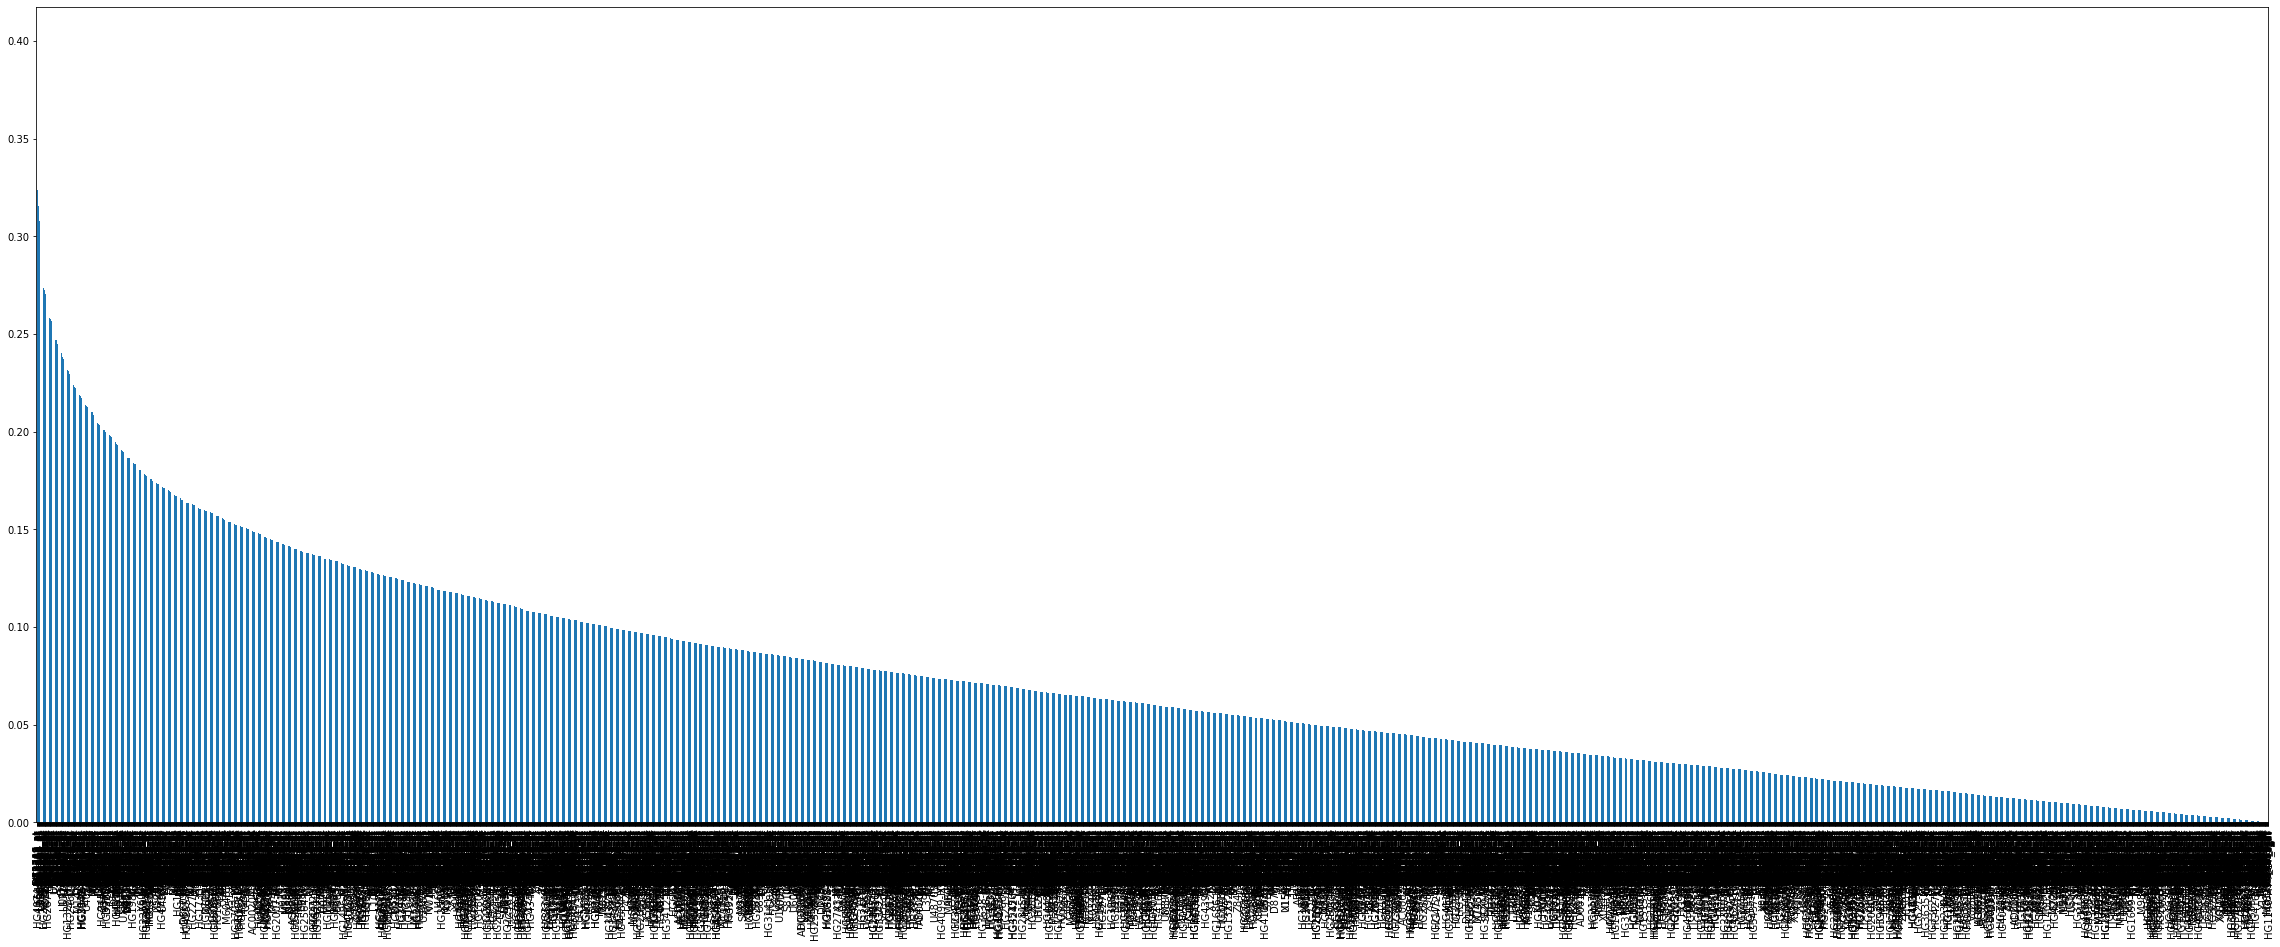

In [31]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=feature_name
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [33]:
required_indices = (-mutual_information).argsort()[:number_of_features_required]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required):
    required_indices[i] = required_indices[i] 
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  D55716_at
Selected Feature 2 is :  D82348_at
Selected Feature 3 is :  X70649_at
Selected Feature 4 is :  HG4074-HT4344_at
Selected Feature 5 is :  M22382_at
Selected Feature 6 is :  X65233_at
Selected Feature 7 is :  U65406_rna4_at
Selected Feature 8 is :  U74612_at
Selected Feature 9 is :  X56494_at
Selected Feature 10 is :  L25441_at
Selected Feature 11 is :  X14850_at
Selected Feature 12 is :  X02152_at
Selected Feature 13 is :  L33842_rna1_at
Selected Feature 14 is :  L19686_rna1_at
Selected Feature 15 is :  L35251_rna1_at
Selected Feature 16 is :  X75958_at
Selected Feature 17 is :  U12595_at
Selected Feature 18 is :  L02426_at
Selected Feature 19 is :  X91148_at
Selected Feature 20 is :  X95239_at
Selected Feature 21 is :  AF006084_at
Selected Feature 22 is :  HG2279-HT2375_at
Selected Feature 23 is :  X72841_at
Selected Feature 24 is :  X75918_at
Selected Feature 25 is :  J04173_at
Selected Feature 26 is :  M86699_at
Selected Feature 27 is :  J03827_at
S

Selected Feature 286 is :  U42360_cds2_at
Selected Feature 287 is :  X98266_cds2_at
Selected Feature 288 is :  U62325_at
Selected Feature 289 is :  Z26876_at
Selected Feature 290 is :  D87023_cds2_at
Selected Feature 291 is :  U19107_rna1_at
Selected Feature 292 is :  M14758_at
Selected Feature 293 is :  M37981_at
Selected Feature 294 is :  S76992_at
Selected Feature 295 is :  U66075_at
Selected Feature 296 is :  U63090_at
Selected Feature 297 is :  X79536_at
Selected Feature 298 is :  Y07596_at
Selected Feature 299 is :  M14091_at
Selected Feature 300 is :  M27543_at
Selected Feature 301 is :  M75715_s_at
Selected Feature 302 is :  X79568_at
Selected Feature 303 is :  U28369_at
Selected Feature 304 is :  HG1980-HT2023_at
Selected Feature 305 is :  U34343_at
Selected Feature 306 is :  L24893_s_at
Selected Feature 307 is :  U97018_at
Selected Feature 308 is :  D38553_at
Selected Feature 309 is :  U05861_at
Selected Feature 310 is :  AB002382_at
Selected Feature 311 is :  M94556_at
Selec

Selected Feature 526 is :  U02082_at
Selected Feature 527 is :  L36847_at
Selected Feature 528 is :  M55131_at
Selected Feature 529 is :  U04811_at
Selected Feature 530 is :  U71374_at
Selected Feature 531 is :  U59913_at
Selected Feature 532 is :  X83618_at
Selected Feature 533 is :  X72925_at
Selected Feature 534 is :  S67070_at
Selected Feature 535 is :  X79439_at
Selected Feature 536 is :  HG2709-HT2805_at
Selected Feature 537 is :  X15088_at
Selected Feature 538 is :  M60858_rna1_at
Selected Feature 539 is :  U21931_at
Selected Feature 540 is :  X53390_s_at
Selected Feature 541 is :  X81895_at
Selected Feature 542 is :  X54326_at
Selected Feature 543 is :  U31248_at
Selected Feature 544 is :  M25753_at
Selected Feature 545 is :  X51420_at
Selected Feature 546 is :  U70136_at
Selected Feature 547 is :  X75917_at
Selected Feature 548 is :  U41387_at
Selected Feature 549 is :  X54867_s_at
Selected Feature 550 is :  Y10517_at
Selected Feature 551 is :  M77235_at
Selected Feature 552 i

Selected Feature 754 is :  X13451_s_at
Selected Feature 755 is :  U14577_s_at
Selected Feature 756 is :  D14659_at
Selected Feature 757 is :  X77584_at
Selected Feature 758 is :  U27459_at
Selected Feature 759 is :  L42176_at
Selected Feature 760 is :  X81836_s_at
Selected Feature 761 is :  HG2007-HT2056_s_at
Selected Feature 762 is :  L20010_at
Selected Feature 763 is :  D64142_at
Selected Feature 764 is :  U49785_at
Selected Feature 765 is :  Z25535_at
Selected Feature 766 is :  X81333_at
Selected Feature 767 is :  M19878_s_at
Selected Feature 768 is :  D80002_at
Selected Feature 769 is :  S78296_at
Selected Feature 770 is :  X14362_at
Selected Feature 771 is :  X51688_at
Selected Feature 772 is :  U67614_at
Selected Feature 773 is :  X69089_at
Selected Feature 774 is :  M24486_s_at
Selected Feature 775 is :  X81625_at
Selected Feature 776 is :  U85767_at
Selected Feature 777 is :  U40622_at
Selected Feature 778 is :  U79293_at
Selected Feature 779 is :  U86214_at
Selected Feature 78

Selected Feature 985 is :  Z83741_at
Selected Feature 986 is :  HG870-HT870_at
Selected Feature 987 is :  D82347_at
Selected Feature 988 is :  HG3137-HT3313_at
Selected Feature 989 is :  HG4027-HT4297_f_at
Selected Feature 990 is :  X13589_at
Selected Feature 991 is :  M13903_at
Selected Feature 992 is :  U88892_at
Selected Feature 993 is :  X15422_at
Selected Feature 994 is :  X66839_at
Selected Feature 995 is :  U38980_at
Selected Feature 996 is :  X84746_at
Selected Feature 997 is :  D28416_at
Selected Feature 998 is :  X00274_at
Selected Feature 999 is :  D85758_at
Selected Feature 1000 is :  D28539_s_at
Selected Feature 1001 is :  M16714_at
Selected Feature 1002 is :  Y00451_s_at
Selected Feature 1003 is :  X95152_rna1_at
Selected Feature 1004 is :  X99699_at
Selected Feature 1005 is :  M97675_at
Selected Feature 1006 is :  U38372_at
Selected Feature 1007 is :  U93205_at
Selected Feature 1008 is :  U47334_at
Selected Feature 1009 is :  L15533_rna1_at
Selected Feature 1010 is :  M6

Selected Feature 1343 is :  U38227_s_at


In [34]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 1343
['D55716_at', 'D82348_at', 'X70649_at', 'HG4074-HT4344_at', 'M22382_at', 'X65233_at', 'U65406_rna4_at', 'U74612_at', 'X56494_at', 'L25441_at', 'X14850_at', 'X02152_at', 'L33842_rna1_at', 'L19686_rna1_at', 'L35251_rna1_at', 'X75958_at', 'U12595_at', 'L02426_at', 'X91148_at', 'X95239_at', 'AF006084_at', 'HG2279-HT2375_at', 'X72841_at', 'X75918_at', 'J04173_at', 'M86699_at', 'J03827_at', 'L41913_at', 'X83929_s_at', 'X82240_rna1_at', 'AC000062_at', 'U59309_at', 'U28386_at', 'Y00067_rna1_at', 'U57452_at', 'X74801_at', 'HG2874-HT3018_at', 'M63835_at', 'D13627_at', 'S75313_at', 'L40157_at', 'Z78290_at', 'L27559_s_at', 'U09413_at', 'M29458_at', 'M34309_at', 'X62078_at', 'X69433_at', 'X15217_at', 'X05608_at', 'J05036_s_at', 'X64810_at', 'X17620_at', 'M26679_at', 'L10615_s_at', 'D10511_at', 'U16799_s_at', 'X65550_at', 'D26599_at', 'M19645_at', 'U46024_at', 'D45248_at', 'L07548_at', 'U37426_at', 'L06132_at', 'D38048_at', 'M34079_at', 'U44105_at', 'L19437_at', 'D

In [35]:
X_train2 = X_train[required_features_mi]
X_train2.head()

,D55716_at,D82348_at,X70649_at,HG4074-HT4344_at,M22382_at,X65233_at,U65406_rna4_at,U74612_at,X56494_at,L25441_at,...,HG429-HT429_at,S82472_at,M29335_s_at,U56102_at,X65724_at,M26901_s_at,HG4310-HT4580_at,X04470_s_at,X52008_at,U38227_s_at
22,-0.338109,-0.537633,0.826900,0.818548,0.635781,-0.215212,0.003089,-0.253901,-1.067867,0.720756,...,0.547057,-0.359726,0.471705,-1.187811,-0.243537,0.137816,0.934368,-0.389456,1.051633,0.620865
41,0.049268,0.283055,1.368254,0.236078,0.925987,-0.247141,-0.664722,0.458837,0.891184,-0.469463,...,-0.713266,0.236483,-1.026080,0.190535,-0.432138,-0.367794,0.291165,0.228823,-2.056288,0.406185
50,1.800181,0.932957,1.232915,-0.179441,0.634328,-1.364666,-0.609833,-0.407128,0.180520,0.601734,...,0.040329,-0.086463,0.332625,-0.206615,0.618640,-0.010892,0.766725,0.252481,-0.531857,-0.036593
38,-0.443957,-0.447655,-0.486250,-0.598670,-0.982287,3.744018,-0.124984,-0.804125,0.017149,2.336052,...,-0.973126,-1.067724,-0.940493,-0.370148,0.874598,1.517834,-0.687324,-0.162333,-1.037540,-4.531460
61,-0.879113,-1.213898,-2.150547,-0.829617,-1.109234,-0.183282,-0.079244,-1.247555,-1.194830,1.179840,...,0.521071,-0.570883,-1.218653,0.564324,3.312942,2.106721,-3.297769,0.672027,-0.439579,-1.203917


In [36]:
X_test2 = X_test[required_features_mi]
X_test2.head()

,D55716_at,D82348_at,X70649_at,HG4074-HT4344_at,M22382_at,X65233_at,U65406_rna4_at,U74612_at,X56494_at,L25441_at,...,HG429-HT429_at,S82472_at,M29335_s_at,U56102_at,X65724_at,M26901_s_at,HG4310-HT4580_at,X04470_s_at,X52008_at,U38227_s_at
48,0.188194,-0.284893,0.676930,0.075621,-0.095981,-0.055565,-0.911720,0.391510,0.820701,-0.435456,...,0.196245,-0.223094,0.600087,-0.136530,-0.526439,-0.445122,0.646979,-0.227000,-0.838219,0.661117
74,-0.784290,-0.373152,0.578170,-0.707187,-0.037591,-0.087495,-0.948312,-0.458204,-0.979413,0.363690,...,-0.245517,0.497325,-0.319981,1.265178,-1.698460,-0.415380,-0.057806,-0.446236,-0.993246,0.553777
59,-0.921746,-1.110166,-1.053208,-0.760055,-1.092676,0.519162,0.021385,-0.718225,-1.181760,-0.758516,...,0.819910,1.503427,0.000973,0.377430,1.548174,0.637478,0.811201,0.231977,2.236482,-0.935567
54,0.241119,0.394810,1.386543,0.622845,0.801654,-0.023636,2.976218,0.215067,0.423009,0.941796,...,-0.583336,0.348273,1.391774,0.097088,-0.324366,-0.415380,0.585396,-0.144983,0.424143,1.050225
34,-0.165369,0.725493,-0.921527,0.181356,0.265107,1.860191,-0.527500,-0.114604,-0.515206,2.319048,...,0.936847,0.696061,-2.566660,0.400791,1.265272,0.227042,-0.382829,0.432287,1.690197,-0.881897


In [37]:
y_train2 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test2 = np.array([a+1 for a in y_test])

print(y_test2)

[1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1]
[1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1]


# KNN Classifier

In [38]:
temp_fscore=0
temp_cm = np.zeros([2,2])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train2, y_train2) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train2)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train2, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test2)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test2, y_test_prediction)))
    
    f_score_knn = f1_score(y_test2, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test2, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test2, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test2, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test2, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test2, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 93.7500
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.8033
Testing accuracy on selected features for 2 neighbors: 81.2500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 98.3607
Testing accuracy on selected features for 3 neighbors: 81.2500
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 95.0820
Testing accuracy on selected features for 4 neighbors: 93.7500
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 93.4426
Testing accuracy on selected features for 5 neighbors: 93.7500
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 91.8033
Testing accuracy on selected features for 6 neighbors: 75.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [39]:
cm = confusion_matrix(y_test2, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[11  0]
 [ 1  4]]
Average Confusion matrix is : [[10.89473684  0.10526316]
 [ 2.57894737  2.42105263]]


Confusion Matrix of KNN Classifier:


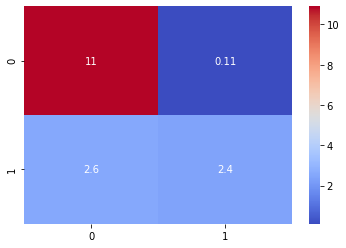

In [40]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [41]:
f_score_knn = f1_score(y_test2, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9375
Average F-Score is : 0.8322368421052632


# SVM(Support Vector Machine)

In [42]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train2,y_train2)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train2)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train2, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test2)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test2, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 100.0000
Testing accuracy on selected features: 75.0000


In [43]:
cm_svc = confusion_matrix(y_test2, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[11  0]
 [ 4  1]]


Confusion Matrix of SVM Classifier:


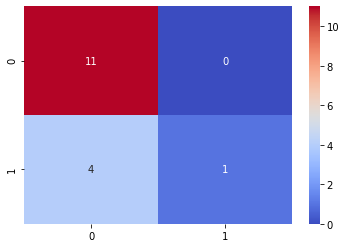

In [44]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [45]:
f_score_svc = f1_score(y_test2, y_test_prediction_svc,average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.75


# Feature Selection Using T-Test

In [46]:
start_time_t = time.time()
x= df.values                # It is converting df into numpy arrray

a,b = x.shape              # Here, a is taking row and b is taking columns 

n1 =0;
n2 = 0;

for i in range(a):      
    if x[i][b-1] == 1:
        n1+=1;
    else:
        n2+=1;


sample_1 = []
sample_2= []
tval=[]

# It is calculating t value

for j in range(1,b-1):      
    for i in range(a):

        if x[i][b-1]== 1:           
            sample_1.append(x[i][j])
        else:
            sample_2.append(x[i][j])


# It is converting sample values from string to integer
    sample_1 = list(map(int,sample_1))       
    sample_2 = list(map(int,sample_2))


    s1_bar = statistics.mean(sample_1)          
    s2_bar = statistics.mean(sample_2)

    s1_var = statistics.variance(sample_1)      
    s2_var = statistics.variance(sample_2)



    t = abs(s1_bar - s2_bar)/np.sqrt(s1_var/n1+s2_var/n2)         # It is calculating t value by comparing mean and variance using given formula

    tval.append(t)       

    sample_1.clear()      
    sample_2.clear()



new_index=[]

new_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index.reverse()     

required_features_t = new_index[:number_of_features_required]  #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :14.191572904586792 seconds


In [47]:
print(required_features_t)

[3967, 6118, 4231, 1031, 1291, 1982, 6754, 2060, 5821, 773, 544, 1757, 1049, 1729, 4311, 1419, 2927, 1127, 4141, 4055, 4122, 5874, 5933, 521, 4402, 445, 1799, 4097, 911, 5219, 2700, 2944, 142, 380, 377, 2728, 4485, 1369, 3102, 4424, 3326, 241, 1071, 5937, 3757, 1312, 4279, 1719, 6130, 1308, 3963, 6925, 6301, 2076, 4092, 2245, 2880, 5895, 955, 4519, 1764, 324, 3675, 1643, 312, 5016, 4269, 1115, 3400, 2868, 1672, 1630, 6463, 2325, 314, 3696, 262, 167, 3826, 1842, 2858, 5533, 2331, 3290, 4533, 6316, 2876, 1762, 102, 214, 5193, 4069, 6049, 579, 344, 2084, 3578, 2033, 3187, 221, 5539, 1156, 4181, 130, 3632, 1285, 5241, 1058, 1333, 379, 5275, 110, 2221, 4072, 477, 4363, 4442, 1873, 2050, 5643, 2322, 1112, 4506, 6413, 5108, 4693, 6234, 2360, 2124, 4312, 4326, 4212, 3076, 1418, 3949, 5962, 3196, 1881, 3438, 3120, 5126, 2319, 5348, 2607, 2822, 2584, 1969, 2258, 4441, 3867, 6598, 5518, 1560, 4049, 4392, 6615, 1743, 3249, 139, 5605, 5898, 3926, 2358, 3433, 1490, 2116, 6291, 531, 5989, 6488, 3222,

In [48]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  1343


In [49]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['X01715_at', 'U59058_s_at', 'X56468_at', 'J03890_rna1_at', 'L17128_at', 'M57609_at', 'D90042_at', 'M62994_at', 'HG4155-HT4425_s_at', 'HG2274-HT2370_at', 'D82346_at', 'M22324_at', 'J04164_at', 'M20218_at', 'X62055_at', 'L33801_at', 'U28369_at', 'L02321_at', 'X17576_at', 'X12433_at', 'X16354_at', 'V00594_at', 'M27968_s_at', 'D79996_at', 'X67734_at', 'D55696_at', 'M25629_at', 'X15088_at', 'HG4073-HT4343_at', 'J00220_cds4_at', 'U12535_at', 'U29656_at', 'D13630_at', 'D44466_at', 'D43949_at', 'U14417_at', 'X74795_at', 'L25851_at', 'U40343_at', 'X69398_at', 'U53225_at', 'D25303_at', 'J04982_at', 'J04617_s_at', 'U81262_at', 'L19605_at', 'X59812_at', 'M19507_at', 'M36429_s_at', 'L19401_at', 'X01059_at', 'U04241_at', 'Z31690_s_at', 'M63623_at', 'X14830_at', 'M86667_at', 'U24576_at', 'U50327_s_at', 'HG4704-HT5146_at', 'X76498_at', 'M22638_at', 'D38047_at', 'U78524_at', 'M13755_at', 'D31886_at', 'Z21707_at', 'X59434_at', 'K03474_at', 'U59302_at', 'U23070_at', 'M15182_at', '

In [50]:
X_train3 = X_train.iloc[:,required_features_t]

In [51]:
X_train3.head()

,X01715_at,U59058_s_at,X56468_at,J03890_rna1_at,L17128_at,M57609_at,D90042_at,M62994_at,HG4155-HT4425_s_at,HG2274-HT2370_at,...,X12492_at,X16609_s_at,X59842_rna1_s_at,D61380_at,J04513_at,D50370_at,HG2348-HT2444_s_at,M16591_s_at,HG2314-HT2410_at,J03191_at
22,-0.350835,-0.110009,-0.315775,-0.835800,-1.084875,-0.494323,-0.157280,-0.449745,-0.302754,0.071092,...,-0.906615,0.175653,-0.210966,0.450331,0.608625,-0.131297,0.122535,-0.845682,-0.922543,-0.877035
41,-1.422374,-0.844870,0.856985,0.273518,-0.387998,-1.658498,-0.650150,-0.708478,1.257805,-0.209129,...,-0.692702,-0.639788,0.006291,0.355361,0.027075,-1.046807,0.086352,1.101811,0.050240,0.559644
50,0.530307,1.091055,0.411452,-0.053226,-0.470424,-0.070987,0.556879,-0.403306,0.410094,-0.007109,...,-0.997791,0.267620,0.006291,-0.228029,0.378200,0.614190,-0.394367,2.883056,0.611288,-0.655431
38,2.230600,2.758321,-0.686574,-0.831766,3.223777,2.431677,0.466352,1.381286,-0.476149,-0.564293,...,2.442354,0.874603,3.955082,-0.701524,0.312364,0.261065,-0.930221,0.166064,-1.899851,-0.311238
61,1.110354,3.627511,-1.354875,1.039956,2.631805,3.178741,1.240863,0.074354,-2.402766,-1.299058,...,2.544050,-0.964739,-1.705341,-1.652132,-1.081161,1.268127,0.358586,-0.798182,0.303617,-1.001288


In [52]:
X_test3 = X_test.iloc[:,required_features_t]
X_test3.head()

,X01715_at,U59058_s_at,X56468_at,J03890_rna1_at,L17128_at,M57609_at,D90042_at,M62994_at,HG4155-HT4425_s_at,HG2274-HT2370_at,...,X12492_at,X16609_s_at,X59842_rna1_s_at,D61380_at,J04513_at,D50370_at,HG2348-HT2444_s_at,M16591_s_at,HG2314-HT2410_at,J03191_at
48,-1.077002,-0.236436,0.181499,-0.847901,-0.380504,-0.400940,-0.871439,-0.157842,1.142208,0.615242,...,-1.102994,-1.062837,-0.152248,-0.490780,0.180692,-0.955256,-0.175545,0.524688,0.032142,0.863621
74,-1.103569,0.063830,0.893634,-0.650241,-0.230638,-1.104426,-0.509330,0.903626,0.853216,0.976922,...,-0.892588,-0.149297,-0.812826,1.243108,0.059993,0.457246,-0.144531,-0.216309,-0.424840,0.749075
59,0.698565,-0.362864,-0.719630,-0.638139,0.188987,-0.195498,0.949164,-0.821258,0.410094,-0.603393,...,1.200956,1.383488,3.256337,-0.812775,1.157257,1.516622,-0.258249,-0.943057,-1.356902,-0.927236
54,-0.014319,-1.255760,1.095562,0.108129,0.496213,-0.033634,-0.529447,0.392795,1.238539,0.199798,...,-0.668154,1.199553,0.141343,0.747453,0.465981,-0.039746,0.098413,-0.240059,0.004995,-0.821842
34,1.880800,-0.457685,-1.395116,1.951614,1.268023,0.358575,0.657465,-1.252480,-1.304594,-1.149172,...,2.252988,0.218571,-1.608456,-0.964275,0.279446,-0.811390,-0.916437,-0.886057,-0.655593,-0.492904


In [53]:
X_test3.shape

(16, 1343)

In [54]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1]
[1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1]


# KNN Classifier

In [55]:
temp_fscore=0
temp_cm = np.zeros([2,2])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 81.2500
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 93.4426
Testing accuracy on selected features for 2 neighbors: 87.5000
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 91.8033
Testing accuracy on selected features for 3 neighbors: 87.5000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 91.8033
Testing accuracy on selected features for 4 neighbors: 100.0000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 93.4426
Testing accuracy on selected features for 5 neighbors: 93.7500
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 90.1639
Testing accuracy on selected features for 6 neighbors: 81.2500
KNN Classfier for 7 neighbors:
Training accuracy o

In [56]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[11  0]
 [ 0  5]]
Average Confusion matrix is : [[10.63157895  0.36842105]
 [ 2.94736842  2.05263158]]


Confusion Matrix of KNN Classifier:


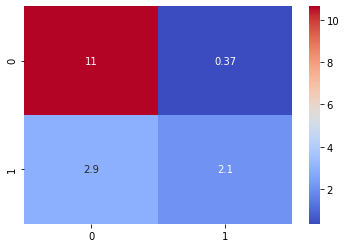

In [57]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [58]:
f_score_knn = f1_score(y_test3, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 1.0
Average F-Score is : 0.7927631578947368


# SVM(Support Vector Machine)

In [59]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.3607
Testing accuracy on selected features: 68.7500


In [60]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[11  0]
 [ 5  0]]


Confusion Matrix of SVM Classifier:


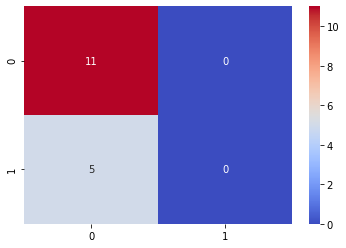

In [61]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [62]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc,average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.6875


# (b) Classification of N/3 features using F = { f1 U f2 U f3)

In [88]:
columns = feature_set.shape[1]

number_of_features_required = columns/3
number_of_features_required_1 = 0.19*columns

print('number_of_features_required : '+str(number_of_features_required))
print('number_of_features_required_1 : '+str(number_of_features_required_1))

number_of_features_required = int(number_of_features_required)
number_of_features_required_1 = int(number_of_features_required_1)

print('number_of_features_required in integers: '+str(number_of_features_required))
print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))

number_of_features_required : 2356.6666666666665
number_of_features_required_1 : 1343.3
number_of_features_required in integers: 2356
number_of_features_required_1 in integers: 1343


In [89]:
selected_features_fc = selected_features_fc[:number_of_features_required]
required_features_mi = required_features_mi[:number_of_features_required]
selected_features_tt = selected_features_tt[:number_of_features_required]
f1 = set(selected_features_fc)
f2 = set(required_features_mi)
new_set = f1.union(f2,selected_features_tt)
new_list = list(new_set)
print('Length of new_list :',len(new_list))

Length of new_list : 4001


In [90]:
print('new list :',new_list)

new list : ['X62573_at', 'Z34897_at', 'X12451_at', 'U59831_rna1_s_at', 'L06419_at', 'HG3162-HT3339_at', 'X15393_rna1_at', 'U49278_at', 'V00594_at', 'D38551_at', 'M21539_at', 'X52056_at', 'M27394_s_at', 'M26683_at', 'X64229_at', 'D63880_at', 'M27691_at', 'U79734_at', 'D63876_at', 'M55542_at', 'X65962_s_at', 'U65785_at', 'X82324_at', 'L19063_at', 'U06681_at', 'S77575_at', 'HG2264-HT2360_at', 'M77698_at', 'U82468_at', 'HG4724-HT5166_at', 'M34668_at', 'Y10615_at', 'U49250_at', 'L21998_at', 'L10955_cds1_s_at', 'X06825_at', 'X82018_at', 'L03532_at', 'U59748_at', 'M13934_cds1_at', 'U41371_at', 'U62801_at', 'HG3703-HT3915_s_at', 'U73960_at', 'U77643_at', 'D88613_at', 'HG2238-HT2321_s_at', 'HG2365-HT2461_at', 'M17252_at', 'J04794_at', 'X59841_at', 'X68285_s_at', 'X04571_at', 'U11821_s_at', 'M14648_at', 'M94077_at', 'S72503_s_at', 'M84332_at', 'L21934_at', 'U46025_at', 'L32977_at', 'L41913_at', 'U40846_s_at', 'M16801_at', 'X77737_at', 'U13219_at', 'X68688_rna1_s_at', 'U64105_at', 'HG3731-HT4001_

In [91]:
required_features = new_list[:number_of_features_required_1]
print('Length of required features : '+str(len(required_features)))

Length of required features : 1343


In [92]:
X_train4 = X_train[required_features]
X_train4.head()

,X62573_at,Z34897_at,X12451_at,U59831_rna1_s_at,L06419_at,HG3162-HT3339_at,X15393_rna1_at,U49278_at,V00594_at,D38551_at,...,J04031_at,M62782_s_at,U38175_at,L39009_at,U63824_at,D25328_at,U51561_at,L15409_at,HG1496-HT1496_s_at,U57623_s_at
22,-0.540563,-0.670999,0.546974,-0.823638,-0.056998,-2.097068,-1.299263,-0.965622,-0.458852,1.905247,...,-1.141765,0.332106,-0.272278,0.273387,-0.539596,-0.479922,0.391072,0.217215,0.093973,-1.328631
41,-0.590875,-0.551767,1.298703,-0.762326,0.738408,0.260122,-0.796010,0.332630,-0.069275,1.595931,...,0.606513,1.010551,1.138636,0.011408,0.162244,1.132307,0.434131,-0.714761,0.297803,-1.343382
50,-0.092130,0.314647,0.202151,-0.597256,1.390480,-0.559186,0.469150,-0.006979,1.026465,-0.482398,...,0.126788,0.569324,0.339788,-0.019413,-0.183278,-0.655416,-0.068223,-0.823871,-0.531104,-0.684495
38,0.117868,2.595939,-0.153578,1.878804,0.021735,0.807447,2.622733,-0.297151,-0.682044,-1.083653,...,0.992272,-4.260445,-2.194685,1.305894,2.818438,-1.556027,0.261895,0.199030,-2.127768,1.946139
61,0.076306,1.642088,-1.060519,2.567384,-0.565735,-0.199899,2.546824,-0.421818,-0.983557,-1.116091,...,-0.046309,-1.157626,-1.677445,-1.406363,-0.410026,-1.532885,-0.642342,-0.105567,-1.597811,3.750704


In [93]:
X_test4 = X_test[required_features]
X_test4.head()

,X62573_at,Z34897_at,X12451_at,U59831_rna1_s_at,L06419_at,HG3162-HT3339_at,X15393_rna1_at,U49278_at,V00594_at,D38551_at,...,J04031_at,M62782_s_at,U38175_at,L39009_at,U63824_at,D25328_at,U51561_at,L15409_at,HG1496-HT1496_s_at,U57623_s_at
48,-0.628062,-0.678947,-0.356612,-0.771759,0.788878,-1.022565,-1.198050,0.291791,0.045814,-0.264602,...,0.250428,0.839754,0.431742,-0.404677,0.043471,3.001028,-0.484459,-1.032997,0.583164,-1.304046
74,-0.363377,-0.202022,-0.278586,-0.965127,-1.183488,-0.622985,-1.001247,-0.767875,-0.306073,0.722430,...,-0.612583,0.678445,0.638638,0.119282,0.259421,-0.466422,0.132718,0.244493,1.147092,-0.635324
59,-0.238691,1.427472,-0.688849,-1.493353,-0.036810,0.162745,0.542248,-1.204208,-0.789780,-0.466179,...,0.010566,1.608342,-0.398715,0.211745,-0.183278,-0.921549,-1.187755,0.976435,0.318186,-0.271461
54,-0.490251,-0.639204,1.402737,-0.988709,0.738408,-1.103153,-1.006870,0.710929,-0.035447,0.606581,...,0.252901,1.205070,1.385761,0.627830,-0.323646,-0.013224,2.773665,2.681270,-0.069090,-0.497646
34,-0.105255,1.435421,-0.745900,1.727882,0.940288,2.143859,2.541201,-0.529289,-0.631118,-1.008351,...,0.515019,-0.759099,0.069674,0.658651,-1.219841,-0.296714,-1.044225,0.535451,1.337333,2.388675


In [94]:
y_train4 = np.array([a+1 for a in y_train]) 
print(y_train4)

y_test4 = np.array([a+1 for a in y_test])

print(y_test4)

[1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1]
[1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1]


# KNN Classifier

In [95]:
temp_fscore=0
temp_cm = np.zeros([2,2])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train4, y_train4) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train4)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train4, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test4)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test4, y_test_prediction)))
    
    f_score_knn = f1_score(y_test4, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test4, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test4, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test4, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test4, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test4, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 68.7500
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 88.5246
Testing accuracy on selected features for 2 neighbors: 93.7500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 95.0820
Testing accuracy on selected features for 3 neighbors: 87.5000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 90.1639
Testing accuracy on selected features for 4 neighbors: 93.7500
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 95.0820
Testing accuracy on selected features for 5 neighbors: 100.0000
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 91.8033
Testing accuracy on selected features for 6 neighbors: 87.5000
KNN Classfier for 7 neighbors:
Training accuracy o

In [96]:
cm = confusion_matrix(y_test4, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[11  0]
 [ 0  5]]
Average Confusion matrix is : [[10.68421053  0.31578947]
 [ 3.10526316  1.89473684]]


Confusion Matrix of KNN Classifier:


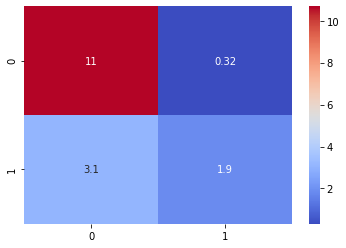

In [97]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [98]:
f_score_knn = f1_score(y_test4, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 1.0
Average F-Score is : 0.7861842105263158


# SVM(Support Vector Machine)

In [99]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train4,y_train4)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train4)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train4, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test4)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test4, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.3607
Testing accuracy on selected features: 68.7500


In [100]:
cm_svc = confusion_matrix(y_test4, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[11  0]
 [ 5  0]]


Confusion Matrix of SVM Classifier:


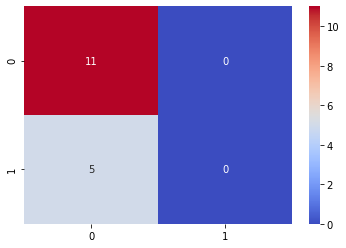

In [101]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [102]:
f_score_svc = f1_score(y_test4, y_test_prediction_svc,average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.6875
